In [ ]:
# Create list of urls to scrape, from 08/01 to 10/27
# Remember to avoid the most recent day's data -- different layout! Missing 1 <a> tag
# Didn't end up using this in the end -- got data for specific movies

url = 'http://www.the-numbers.com/box-office-chart/daily/2015/'

urllist = []

for i in reversed(range(1,28)):
    if i < 10:
        urllist.append(url + '10/' + '0' + str(i))
    else:
        urllist.append(url + '10/' + str(i))
for i in reversed(range(1,31)):
    if i < 10:
        urllist.append(url + '09/' + '0' + str(i))
    else:
        urllist.append(url + '09/' + str(i))
for i in reversed(range(1,32)):
    if i < 10:
        urllist.append(url + '08/' + '0' + str(i))
    else:
        urllist.append(url + '08/' + str(i))

In [92]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

def scraper(list_):
    
    '''Scrape the-numbers.com for daily box office data.'''
    
    movieDF = pd.DataFrame()

    for url in list_:
        
        date = re.findall('daily.*', url)
        date = date[0][6:]
        date = re.sub('/','-', date)
        data = requests.get(url).text
        data = BeautifulSoup(data)
        aTag = data.find_all('a')
        movies = [tag.string for tag in aTag]
        movies = movies[52:82]
        data_sublists = [movies[i:i+2] for i in range(0, len(movies), 2)]
        dataframe = pd.DataFrame(data_sublists [0:], columns = ['Title','Studio'])
        moviedata = data.find_all('td', {'class': "data"})
        moviedata = [tag.string for tag in moviedata]
        data_sublists2 = [moviedata[i:i+8] for i in range(0, len(moviedata), 8)]
        dataframe2 = pd.DataFrame(data_sublists2 [0:], columns=['Rank','PreviousRank','Gross','Change','Theaters','PerTheater','TotalGross','Days'])
        dataframe2['Title'] = dataframe['Title']
        dataframe2['Studio'] = dataframe['Studio']
        dataframe2['date'] = date
        dataframe2 = dataframe2[:15]
        movieDF = movieDF.append(dataframe2)
    return movieDF

url = 'http://www.the-numbers.com/box-office-chart/daily/'

In [2]:
# Saving Private Ryan
urlSPR = []

for i in range(24,32):

        urlSPR.append(url + '1998/07/' + str(i))
for i in range(1,24):
    if i < 10:
        urlSPR.append(url + '1998/08/' + '0' + str(i))
    else:
        urlSPR.append(url + '1998/08/' + str(i))


SPR = scraper(urlSPR)
SPR = SPR[(SPR.Title == 'Saving Private Ryan')]
SPR

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$9,705,000",,"2,463","$3,940","$9,705,000",1,Saving Private Ryan,Dreamworks SKG,1998-07-24
0,1,(1),"$11,170,000",+15%,"2,453","$4,554","$20,875,000",2,Saving Private Ryan,Dreamworks SKG,1998-07-25
0,1,(1),"$9,613,000",-14%,"2,453","$3,919","$30,576,104",3,Saving Private Ryan,Dreamworks SKG,1998-07-26
0,1,(1),"$5,231,469",-46%,"2,463","$2,124","$35,807,573",4,Saving Private Ryan,Dreamworks SKG,1998-07-27
0,1,(1),"$5,035,992",-4%,"2,463","$2,045","$40,843,565",5,Saving Private Ryan,Dreamworks SKG,1998-07-28
0,1,(1),"$4,573,049",-9%,"2,463","$1,857","$45,416,614",6,Saving Private Ryan,Dreamworks SKG,1998-07-29
0,1,(1),"$4,343,746",-5%,"2,463","$1,764","$49,760,360",7,Saving Private Ryan,Dreamworks SKG,1998-07-30
0,1,(1),"$7,005,000",+61%,"2,540","$2,758","$56,765,000",8,Saving Private Ryan,Dreamworks SKG,1998-07-31
0,1,(1),"$9,245,000",+32%,"2,540","$3,640","$66,010,000",9,Saving Private Ryan,Dreamworks SKG,1998-08-01
0,1,(1),"$7,407,000",-20%,"2,540","$2,916","$73,362,000",10,Saving Private Ryan,Dreamworks SKG,1998-08-02


In [3]:
# Bourne Identity

urlBourneI = []

for i in range(14,31):

        urlBourneI.append(url + '2002/06/' + str(i))
for i in range(1,15):
    if i < 10:
        urlBourneI.append(url + '2002/07/' + '0' + str(i))
    else:
        urlBourneI.append(url + '2002/07/' + str(i))


BourneI = scraper(urlBourneI)
BourneI = BourneI[(BourneI.Title == 'The Bourne Identity')]
BourneI

In [5]:
# The Bourne Supremacy
urlBourneS = []

for i in range(23,32):

        urlBourneS.append(url + '2004/07/' + str(i))
for i in range(1,23):
    if i < 10:
        urlBourneS.append(url + '2004/08/' + '0' + str(i))
    else:
        urlBourneS.append(url + '2004/08/' + str(i))

BourneS = scraper(urlBourneS)
BourneS = BourneS[(BourneS.Title == 'The Bourne Supremacy')]
BourneS

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$18,400,000",,"3,162","$5,819","$18,400,000",1,The Bourne Supremacy,Universal,2004-07-23
0,1,(1),"$19,542,565",+6%,"3,165","$6,175","$37,978,690",2,The Bourne Supremacy,Universal,2004-07-24
0,1,(1),"$14,543,175",-26%,"3,165","$4,595","$52,521,865",3,The Bourne Supremacy,Universal,2004-07-25
0,1,(1),"$6,472,000",-55%,"3,165","$2,045","$58,994,000",4,The Bourne Supremacy,Universal,2004-07-26
0,1,(1),"$6,045,000",-7%,"3,165","$1,910","$65,039,000",5,The Bourne Supremacy,Universal,2004-07-27
0,1,(1),"$5,208,000",-14%,"3,165","$1,645","$70,247,000",6,The Bourne Supremacy,Universal,2004-07-28
0,1,(1),"$4,415,000",-15%,"3,165","$1,395","$74,662,000",7,The Bourne Supremacy,Universal,2004-07-29
1,2,(1),"$7,500,000",+70%,"3,180","$2,358","$82,200,000",8,The Bourne Supremacy,Universal,2004-07-30
1,2,(2),"$9,555,990",+27%,"3,180","$3,005","$91,643,425",9,The Bourne Supremacy,Universal,2004-07-31
1,2,(2),"$7,186,650",-25%,"3,180","$2,260","$98,830,075",10,The Bourne Supremacy,Universal,2004-08-01


In [6]:
# Batman Begins
urlBatman = []

for i in range(15,31):

        urlBatman.append(url + '2005/06/' + str(i))
for i in range(1,16):
    if i < 10:
        urlBatman.append(url + '2005/07/' + '0' + str(i))
    else:
        urlBatman.append(url + '2005/07/' + str(i))

Batman = scraper(urlBatman)
Batman = Batman[(Batman.Title == 'Batman Begins')]
Batman

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$15,068,368",,"3,718","$4,053","$15,068,368",1,Batman Begins,Warner Bros.,2005-06-15
0,1,(1),"$9,083,178",-40%,"3,718","$2,443","$24,151,546",2,Batman Begins,Warner Bros.,2005-06-16
0,1,(1),"$15,072,242",+66%,"3,858","$3,907","$39,223,788",3,Batman Begins,Warner Bros.,2005-06-17
0,1,(1),"$18,017,047",+20%,"3,858","$4,670","$57,240,835",4,Batman Begins,Warner Bros.,2005-06-18
0,1,(1),"$15,656,151",-13%,"3,858","$4,058","$72,896,986",5,Batman Begins,Warner Bros.,2005-06-19
0,1,(1),"$6,627,412",-58%,"3,858","$1,718","$79,524,398",6,Batman Begins,Warner Bros.,2005-06-20
0,1,(1),"$5,404,419",-18%,"3,858","$1,401","$84,928,817",7,Batman Begins,Warner Bros.,2005-06-21
0,1,(1),"$5,518,167",+2%,"3,858","$1,430","$90,446,984",8,Batman Begins,Warner Bros.,2005-06-22
0,1,(1),"$4,475,440",-19%,"3,858","$1,160","$94,922,424",9,Batman Begins,Warner Bros.,2005-06-23
0,1,(1),"$8,269,743",+85%,"3,858","$2,144","$103,192,167",10,Batman Begins,Warner Bros.,2005-06-24


In [7]:
# The Bourne Ultimatum
urlBourneU = []

for i in range(3,32):
    if i < 10:
        urlBourneU.append(url + '2007/08/' + '0' + str(i))
    else:
        urlBourneU.append(url + '2007/08/' + str(i))
for i in range(1,3):
    if i < 10:
        urlBourneU.append(url + '2007/09/' + '0' + str(i))
    else:
        urlBourneU.append(url + '2007/09/' + str(i))

BourneU = scraper(urlBourneU)
BourneU = BourneU[(BourneU.Title == 'The Bourne Ultimatum')]
BourneU

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$24,668,225",,"3,660","$6,740","$24,668,225",1,The Bourne Ultimatum,Universal,2007-08-03
0,1,(1),"$25,290,665",+3%,"3,660","$6,910","$49,958,890",2,The Bourne Ultimatum,Universal,2007-08-04
0,1,(1),"$19,324,800",-24%,"3,660","$5,280","$69,283,690",3,The Bourne Ultimatum,Universal,2007-08-05
0,1,(1),"$9,131,700",-53%,"3,660","$2,495","$78,415,390",4,The Bourne Ultimatum,Universal,2007-08-06
0,1,(1),"$7,466,400",-18%,"3,660","$2,040","$85,881,790",5,The Bourne Ultimatum,Universal,2007-08-07
0,1,(1),"$6,734,210",-10%,"3,660","$1,840","$92,616,000",6,The Bourne Ultimatum,Universal,2007-08-08
0,1,(1),"$6,057,300",-10%,"3,660","$1,655","$98,673,300",7,The Bourne Ultimatum,Universal,2007-08-09
1,2,(1),"$10,394,520",+72%,"3,687","$2,819","$109,067,820",8,The Bourne Ultimatum,Universal,2007-08-10
1,2,(2),"$13,232,740",+27%,"3,687","$3,589","$122,300,560",9,The Bourne Ultimatum,Universal,2007-08-11
1,2,(2),"$9,251,865",-30%,"3,687","$2,509","$131,552,425",10,The Bourne Ultimatum,Universal,2007-08-12


In [8]:
# The Dark Knight
urlDarkK = []

for i in range(18,32):
    if i < 10:
        urlDarkK.append(url + '2008/07/' + '0' + str(i))
    else:
        urlDarkK.append(url + '2008/07/' + str(i))
for i in range(1,18):
    if i < 10:
        urlDarkK.append(url + '2008/08/' + '0' + str(i))
    else:
        urlDarkK.append(url + '2008/08/' + str(i))

DarkK = scraper(urlDarkK)
DarkK = DarkK[(DarkK.Title == 'The Dark Knight')]
DarkK

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$67,165,092",,"4,366","$15,384","$67,165,092",1,The Dark Knight,Warner Bros.,2008-07-18
0,1,(1),"$47,650,240",-29%,"4,366","$10,914","$114,815,332",2,The Dark Knight,Warner Bros.,2008-07-19
0,1,(1),"$43,596,151",-9%,"4,366","$9,985","$158,411,483",3,The Dark Knight,Warner Bros.,2008-07-20
0,1,(1),"$24,493,313",-44%,"4,366","$5,610","$182,904,796",4,The Dark Knight,Warner Bros.,2008-07-21
0,1,(1),"$20,868,722",-15%,"4,366","$4,780","$203,773,518",5,The Dark Knight,Warner Bros.,2008-07-22
0,1,(1),"$18,377,288",-12%,"4,366","$4,209","$222,150,806",6,The Dark Knight,Warner Bros.,2008-07-23
0,1,(1),"$16,464,405",-10%,"4,366","$3,771","$238,615,211",7,The Dark Knight,Warner Bros.,2008-07-24
0,1,(1),"$23,232,292",+41%,"4,366","$5,321","$261,847,503",8,The Dark Knight,Warner Bros.,2008-07-25
0,1,(1),"$28,272,494",+22%,"4,366","$6,476","$290,119,997",9,The Dark Knight,Warner Bros.,2008-07-26
0,1,(1),"$23,661,680",-16%,"4,366","$5,420","$313,781,677",10,The Dark Knight,Warner Bros.,2008-07-27


In [9]:
# Green Zone
urlGreenZ = []

for i in range(12,32):
    if i < 10:
        urlGreenZ.append(url + '2010/03/' + '0' + str(i))
    else:
        urlGreenZ.append(url + '2010/03/' + str(i))
for i in range(1,12):
    if i < 10:
        urlGreenZ.append(url + '2010/04/' + '0' + str(i))
    else:
        urlGreenZ.append(url + '2010/04/' + str(i))

GreenZ = scraper(urlGreenZ)
GreenZ = GreenZ[(GreenZ.Title == 'Green Zone')]
GreenZ

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
1,2,new,"$5,045,040",,"3,003","$1,680","$5,045,040",1,Green Zone,Universal,2010-03-12
1,2,(2),"$5,675,670",+13%,"3,003","$1,890","$10,720,710",2,Green Zone,Universal,2010-03-13
1,2,(2),"$3,588,585",-37%,"3,003","$1,195","$14,309,295",3,Green Zone,Universal,2010-03-14
1,2,(2),"$1,231,230",-66%,"3,003",$410,"$15,540,525",4,Green Zone,Universal,2010-03-15
1,2,(2),"$1,276,505",+4%,"3,003",$425,"$16,817,030",5,Green Zone,Universal,2010-03-16
1,2,(2),"$946,025",-26%,"3,003",$315,"$17,763,055",6,Green Zone,Universal,2010-03-17
2,3,(2),"$975,975",+3%,"3,003",$325,"$18,739,030",7,Green Zone,Universal,2010-03-18
5,6,(3),"$1,817,420",+86%,"3,004",$605,"$20,556,450",8,Green Zone,Universal,2010-03-19
3,4,(6),"$2,628,465",+45%,"3,004",$875,"$23,184,915",9,Green Zone,Universal,2010-03-20
3,4,(4),"$1,667,220",-37%,"3,004",$555,"$24,852,135",10,Green Zone,Universal,2010-03-21


In [10]:
# The Descendants
urlDescendants = []

for i in range(9,32):
    if i < 10:
        urlDescendants.append(url + '2011/12/' + '0' + str(i))
    else:
        urlDescendants.append(url + '2011/12/' + str(i))
for i in range(1,9):
    if i < 10:
        urlDescendants.append(url + '2012/01/' + '0' + str(i))
    else:
        urlDescendants.append(url + '2012/01/' + str(i))

Descendants = scraper(urlDescendants)
Descendants = Descendants[(Descendants.Title == 'The Descendants')]
Descendants
# Days issue

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
6,7,(6),"$1,318,017",+250%,876,"$1,505","$20,568,440",24,The Descendants,Fox Searchlight,2011-12-09
6,7,(7),"$2,008,132",+52%,876,"$2,292","$22,576,572",25,The Descendants,Fox Searchlight,2011-12-10
7,8,(7),"$1,053,989",-48%,876,"$1,203","$23,630,561",26,The Descendants,Fox Searchlight,2011-12-11
4,5,(8),"$420,304",-60%,876,$480,"$24,050,865",27,The Descendants,Fox Searchlight,2011-12-12
4,5,(5),"$490,422",+17%,876,$560,"$24,541,287",28,The Descendants,Fox Searchlight,2011-12-13
5,6,(5),"$405,151",-17%,876,$463,"$24,946,438",29,The Descendants,Fox Searchlight,2011-12-14
5,6,(6),"$431,114",+6%,876,$492,"$25,377,552",30,The Descendants,Fox Searchlight,2011-12-15
8,9,(6),"$928,759",+115%,878,"$1,058","$26,306,311",31,The Descendants,Fox Searchlight,2011-12-16
9,10,(9),"$1,469,079",+58%,878,"$1,673","$27,775,390",32,The Descendants,Fox Searchlight,2011-12-17
10,11,(10),"$870,519",-41%,878,$991,"$28,645,909",33,The Descendants,Fox Searchlight,2011-12-18


In [11]:
# The Hunger Games
urlHungerG = []

for i in range(23,32):
    if i < 10:
        urlHungerG.append(url + '2012/03/' + '0' + str(i))
    else:
        urlHungerG.append(url + '2012/03/' + str(i))
for i in range(1,23):
    if i < 10:
        urlHungerG.append(url + '2012/04/' + '0' + str(i))
    else:
        urlHungerG.append(url + '2012/04/' + str(i))

HungerG = scraper(urlHungerG)
HungerG = HungerG[(HungerG.Title == 'The Hunger Games')]
HungerG

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$67,263,650",,"4,137","$16,259","$67,263,650",1,The Hunger Games,Lionsgate,2012-03-23
0,1,(1),"$50,394,419",-25%,"4,137","$12,181","$117,658,069",2,The Hunger Games,Lionsgate,2012-03-24
0,1,(1),"$34,877,678",-31%,"4,137","$8,431","$152,535,747",3,The Hunger Games,Lionsgate,2012-03-25
0,1,(1),"$10,823,788",-69%,"4,137","$2,616","$163,359,535",4,The Hunger Games,Lionsgate,2012-03-26
0,1,(1),"$10,348,198",-4%,"4,137","$2,501","$173,707,733",5,The Hunger Games,Lionsgate,2012-03-27
0,1,(1),"$8,051,705",-22%,"4,137","$1,946","$181,759,438",6,The Hunger Games,Lionsgate,2012-03-28
0,1,(1),"$8,173,400",+2%,"4,137","$1,976","$189,932,838",7,The Hunger Games,Lionsgate,2012-03-29
0,1,(1),"$18,652,560",+128%,"4,137","$4,509","$208,585,398",8,The Hunger Games,Lionsgate,2012-03-30
0,1,(1),"$24,738,873",+33%,"4,137","$5,980","$233,324,271",9,The Hunger Games,Lionsgate,2012-03-31
0,1,(1),"$15,159,630",-39%,"4,137","$3,664","$248,483,901",10,The Hunger Games,Lionsgate,2012-04-01


In [12]:
# Avengers
urlAvengers = []

for i in range(4,32):
    if i < 10:
        urlAvengers.append(url + '2012/05/' + '0' + str(i))
    else:
        urlAvengers.append(url + '2012/05/' + str(i))
for i in range(1,4):
    if i < 10:
        urlAvengers.append(url + '2012/06/' + '0' + str(i))
    else:
        urlAvengers.append(url + '2012/06/' + str(i))

Avengers = scraper(urlAvengers)
Avengers = Avengers[(Avengers.Title == 'The Avengers')]
Avengers

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$80,813,985",,"4,349","$18,582","$80,813,985",1,The Avengers,Walt Disney,2012-05-04
0,1,(1),"$69,557,990",-14%,"4,349","$15,994","$150,371,975",2,The Avengers,Walt Disney,2012-05-05
0,1,(1),"$57,066,733",-18%,"4,349","$13,122","$207,438,708",3,The Avengers,Walt Disney,2012-05-06
0,1,(1),"$18,898,999",-67%,"4,349","$4,346","$226,337,707",4,The Avengers,Walt Disney,2012-05-07
0,1,(1),"$17,677,190",-6%,"4,349","$4,065","$244,014,897",5,The Avengers,Walt Disney,2012-05-08
0,1,(1),"$13,612,910",-23%,"4,349","$3,130","$257,627,807",6,The Avengers,Walt Disney,2012-05-09
0,1,(1),"$12,391,566",-9%,"4,349","$2,849","$270,019,373",7,The Avengers,Walt Disney,2012-05-10
0,1,(1),"$29,223,517",+136%,"4,349","$6,720","$299,242,890",8,The Avengers,Walt Disney,2012-05-11
0,1,(1),"$42,905,519",+47%,"4,349","$9,866","$342,148,409",9,The Avengers,Walt Disney,2012-05-12
0,1,(1),"$30,923,238",-28%,"4,349","$7,110","$373,071,647",10,The Avengers,Walt Disney,2012-05-13


In [13]:
# DarkKR
urlDarkKR = []

for i in range(20,32):
    if i < 10:
        urlDarkKR.append(url + '2012/07/' + '0' + str(i))
    else:
        urlDarkKR.append(url + '2012/07/' + str(i))
for i in range(1,20):
    if i < 10:
        urlDarkKR.append(url + '2012/08/' + '0' + str(i))
    else:
        urlDarkKR.append(url + '2012/08/' + str(i))

DarkKR = scraper(urlDarkKR)
DarkKR = DarkKR[(DarkKR.Title == 'The Dark Knight Rises')]
DarkKR

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$75,754,897",,"4,404","$17,201","$75,754,897",1,The Dark Knight Rises,Warner Bros.,2012-07-20
0,1,(1),"$44,931,966",-41%,"4,404","$10,203","$120,686,863",2,The Dark Knight Rises,Warner Bros.,2012-07-21
0,1,(1),"$40,200,432",-11%,"4,404","$9,128","$160,887,295",3,The Dark Knight Rises,Warner Bros.,2012-07-22
0,1,(1),"$19,389,129",-52%,"4,404","$4,403","$180,276,424",4,The Dark Knight Rises,Warner Bros.,2012-07-23
0,1,(1),"$17,762,472",-8%,"4,404","$4,033","$198,038,896",5,The Dark Knight Rises,Warner Bros.,2012-07-24
0,1,(1),"$13,770,092",-22%,"4,404","$3,127","$211,808,988",6,The Dark Knight Rises,Warner Bros.,2012-07-25
0,1,(1),"$13,202,371",-4%,"4,404","$2,998","$225,011,359",7,The Dark Knight Rises,Warner Bros.,2012-07-26
0,1,(1),"$17,734,545",+34%,"4,404","$4,027","$242,745,904",8,The Dark Knight Rises,Warner Bros.,2012-07-27
0,1,(1),"$24,712,417",+39%,"4,404","$5,611","$267,458,321",9,The Dark Knight Rises,Warner Bros.,2012-07-28
0,1,(1),"$19,654,489",-20%,"4,404","$4,463","$287,112,810",10,The Dark Knight Rises,Warner Bros.,2012-07-29


In [14]:
# SilverLP
urlSilverLP = []

for i in range(25,32):
    if i < 10:
        urlSilverLP.append(url + '2012/12/' + '0' + str(i))
    else:
        urlSilverLP.append(url + '2012/12/' + str(i))
for i in range(1,25):
    if i < 10:
        urlSilverLP.append(url + '2013/01/' + '0' + str(i))
    else:
        urlSilverLP.append(url + '2013/01/' + str(i))

SilverLP = scraper(urlSilverLP)
SilverLP = SilverLP[(SilverLP.Title == 'Silver Linings Playbook')]
SilverLP
# Figure out how to deal with days issue

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
12,13,(12),"$1,124,532",+185%,745,"$1,509","$21,380,766",40,Silver Linings Playbook,Weinstein Co.,2012-12-25
12,13,(13),"$901,854",-20%,745,"$1,211","$22,282,620",41,Silver Linings Playbook,Weinstein Co.,2012-12-26
12,13,(13),"$968,102",+7%,745,"$1,299","$23,250,722",42,Silver Linings Playbook,Weinstein Co.,2012-12-27
11,12,(13),"$1,284,297",+33%,745,"$1,724","$24,535,019",43,Silver Linings Playbook,Weinstein Co.,2012-12-28
11,12,(12),"$1,531,494",+19%,745,"$2,056","$26,066,513",44,Silver Linings Playbook,Weinstein Co.,2012-12-29
11,12,(12),"$1,263,523",-17%,745,"$1,696","$27,330,036",45,Silver Linings Playbook,Weinstein Co.,2012-12-30
11,12,(12),"$1,128,950",-11%,745,"$1,515","$28,458,986",46,Silver Linings Playbook,Weinstein Co.,2012-12-31
11,12,(12),"$1,353,598",+20%,745,"$1,817","$29,812,584",47,Silver Linings Playbook,Weinstein Co.,2013-01-01
12,13,(12),"$643,415",-52%,745,$864,"$30,455,999",48,Silver Linings Playbook,Weinstein Co.,2013-01-02
12,13,(13),"$604,060",-6%,745,$811,"$31,060,059",49,Silver Linings Playbook,Weinstein Co.,2013-01-03


In [15]:
# Elysium
urlElysium = []

for i in range(8,32):
    if i < 10:
        urlElysium.append(url + '2013/08/' + '0' + str(i))
    else:
        urlElysium.append(url + '2013/08/' + str(i))
for i in range(1,9):
    if i < 10:
        urlElysium.append(url + '2013/09/' + '0' + str(i))
    else:
        urlElysium.append(url + '2013/09/' + str(i))

Elysium = scraper(urlElysium)
Elysium = Elysium[(Elysium.Title == 'Elysium')]
Elysium


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$11,088,228",,"3,284","$3,376","$11,088,228",1,Elysium,Sony Pictures,2013-08-09
0,1,(1),"$10,749,286",-3%,"3,284","$3,273","$21,837,514",2,Elysium,Sony Pictures,2013-08-10
0,1,(1),"$7,969,879",-26%,"3,284","$2,427","$29,807,393",3,Elysium,Sony Pictures,2013-08-11
1,2,(1),"$3,417,121",-57%,"3,284","$1,041","$33,224,514",4,Elysium,Sony Pictures,2013-08-12
1,2,(2),"$3,925,852",+15%,"3,284","$1,195","$37,150,366",5,Elysium,Sony Pictures,2013-08-13
1,2,(2),"$2,720,361",-31%,"3,284",$828,"$39,870,727",6,Elysium,Sony Pictures,2013-08-14
1,2,(2),"$2,443,579",-10%,"3,284",$744,"$42,314,306",7,Elysium,Sony Pictures,2013-08-15
3,4,(2),"$3,937,981",+61%,"3,284","$1,199","$46,252,287",8,Elysium,Sony Pictures,2013-08-16
3,4,(4),"$5,511,887",+40%,"3,284","$1,678","$51,764,174",9,Elysium,Sony Pictures,2013-08-17
2,3,(4),"$4,236,964",-23%,"3,284","$1,290","$56,001,138",10,Elysium,Sony Pictures,2013-08-18


In [17]:
# The Spectacular Now DOESN"T WORK BECAUSE TOO LOW ON LIST
urlSpectac = []

for i in range(13,31):
    if i < 10:
        urlSpectac.append(url + '2013/09/' + '0' + str(i))
    else:
        urlSpectac.append(url + '2013/09/' + str(i))
for i in range(1,14):
    if i < 10:
        urlSpectac.append(url + '2013/10/' + '0' + str(i))
    else:
        urlSpectac.append(url + '2013/10/' + str(i))

Spectac = scraper(urlSpectac)
Spectac = Spectac[(Spectac.Title == 'The Spectacular Now')]
Spectac


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
14,-,(-),"$66,628",-64%,770,$87,"$5,804,348",46,The Spectacular Now,A24,2013-09-16
14,-,(-),"$74,402",+12%,770,$97,"$5,878,750",47,The Spectacular Now,A24,2013-09-17
14,-,(-),"$68,209",-8%,770,$89,"$5,946,960",48,The Spectacular Now,A24,2013-09-18
14,-,(-),"$72,106",+6%,770,$94,"$6,019,066",49,The Spectacular Now,A24,2013-09-19


In [20]:
# Catching Fire
urlCatchF = []

for i in range(22,31):
    if i < 10:
        urlCatchF.append(url + '2013/11/' + '0' + str(i))
    else:
        urlCatchF.append(url + '2013/11/' + str(i))
for i in range(1,23):
    if i < 10:
        urlCatchF.append(url + '2013/12/' + '0' + str(i))
    else:
        urlCatchF.append(url + '2013/12/' + str(i))

CatchF = scraper(urlCatchF)
CatchF = CatchF[CatchF.Title.str.contains('Catching')]
CatchF['Title'] = 'The Hunger Games: Catching Fire'
CatchF


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$70,950,136",,"4,163","$17,043","$70,950,136",1,The Hunger Games: Catching Fire,Lionsgate,2013-11-22
0,1,(1),"$52,619,106",-26%,"4,163","$12,640","$123,569,242",2,The Hunger Games: Catching Fire,Lionsgate,2013-11-23
0,1,(1),"$34,505,044",-34%,"4,163","$8,289","$158,074,286",3,The Hunger Games: Catching Fire,Lionsgate,2013-11-24
0,1,(1),"$12,321,722",-64%,"4,163","$2,960","$170,396,008",4,The Hunger Games: Catching Fire,Lionsgate,2013-11-25
0,1,(1),"$15,960,309",+30%,"4,163","$3,834","$186,356,317",5,The Hunger Games: Catching Fire,Lionsgate,2013-11-26
0,1,(1),"$20,808,110",+30%,"4,163","$4,998","$207,164,427",6,The Hunger Games: Catching Fire,Lionsgate,2013-11-27
0,1,(1),"$14,951,629",-28%,"4,163","$3,592","$222,116,056",7,The Hunger Games: Catching Fire,Lionsgate,2013-11-28
0,1,(1),"$31,570,448",+111%,"4,163","$7,584","$253,686,504",8,The Hunger Games: Catching Fire,Lionsgate,2013-11-29
0,1,(1),"$28,401,259",-10%,"4,163","$6,822","$282,087,763",9,The Hunger Games: Catching Fire,Lionsgate,2013-11-30
1,2,(1),"$14,207,894",-50%,"4,163","$3,413","$296,295,657",10,The Hunger Games: Catching Fire,Lionsgate,2013-12-01


In [21]:
# American Hustle
urlAmHust = []

for i in range(20,32):
    if i < 10:
        urlAmHust.append(url + '2013/12/' + '0' + str(i))
    else:
        urlAmHust.append(url + '2013/12/' + str(i))
for i in range(1,20):
    if i < 10:
        urlAmHust.append(url + '2014/01/' + '0' + str(i))
    else:
        urlAmHust.append(url + '2014/01/' + str(i))

AmHust = scraper(urlAmHust)
AmHust = AmHust[(AmHust.Title == 'American Hustle')]
AmHust
## Also a mess...

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
1,-,(17),"$6,525,032","+8,722%","2,507","$2,603","$7,638,400",8,American Hustle,Sony Pictures,2013-12-20
2,-,(-),"$7,106,516",+9%,"2,507","$2,835","$14,744,916",9,American Hustle,Sony Pictures,2013-12-21
2,-,(-),"$5,475,385",-23%,"2,507","$2,184","$20,220,301",10,American Hustle,Sony Pictures,2013-12-22
3,4,(-),"$6,400,000",,"2,507","$2,553","$46,900,000",15,American Hustle,Sony Pictures,2013-12-27
4,-,(-),"$3,990,011",,"2,507","$1,592","$63,159,175",18,American Hustle,Sony Pictures,2013-12-30
2,-,(-),"$4,359,349",+9%,"2,507","$1,739","$67,518,524",19,American Hustle,Sony Pictures,2013-12-31
3,4,(-),"$5,444,641",+25%,"2,507","$2,172","$72,963,165",20,American Hustle,Sony Pictures,2014-01-01
4,5,(4),"$2,555,751",-53%,"2,507","$1,019","$75,518,916",21,American Hustle,Sony Pictures,2014-01-02
4,-,(5),"$4,163,948",+63%,"2,518","$1,654","$79,682,864",22,American Hustle,Sony Pictures,2014-01-03
4,-,(-),"$5,514,133",+32%,"2,518","$2,190","$85,196,997",23,American Hustle,Sony Pictures,2014-01-04


In [22]:
# Divergent
urlDivergent = []

for i in range(21,32):
    if i < 10:
        urlDivergent.append(url + '2014/03/' + '0' + str(i))
    else:
        urlDivergent.append(url + '2014/03/' + str(i))
for i in range(1,21):
    if i < 10:
        urlDivergent.append(url + '2014/04/' + '0' + str(i))
    else:
        urlDivergent.append(url + '2014/04/' + str(i))

Divergent = scraper(urlDivergent)
Divergent = Divergent[(Divergent.Title == 'Divergent')]
Divergent


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$22,784,019",,"3,936","$5,789","$22,784,019",1,Divergent,Lionsgate,2014-03-21
0,1,(1),"$19,853,462",-13%,"3,936","$5,044","$42,637,481",2,Divergent,Lionsgate,2014-03-22
0,1,(1),"$11,970,266",-40%,"3,936","$3,041","$54,607,747",3,Divergent,Lionsgate,2014-03-23
0,1,(1),"$3,577,283",-70%,"3,936",$909,"$58,185,030",4,Divergent,Lionsgate,2014-03-24
0,1,(1),"$4,198,386",+17%,"3,936","$1,067","$62,383,416",5,Divergent,Lionsgate,2014-03-25
0,1,(1),"$3,308,229",-21%,"3,936",$841,"$65,691,645",6,Divergent,Lionsgate,2014-03-26
0,1,(1),"$3,068,363",-7%,"3,936",$780,"$68,760,008",7,Divergent,Lionsgate,2014-03-27
1,2,(1),"$8,129,132",+165%,"3,936","$2,065","$76,889,140",8,Divergent,Lionsgate,2014-03-28
1,2,(2),"$11,549,082",+42%,"3,936","$2,934","$88,438,222",9,Divergent,Lionsgate,2014-03-29
1,2,(2),"$5,941,364",-49%,"3,936","$1,509","$94,379,586",10,Divergent,Lionsgate,2014-03-30


In [23]:
# Fault in our Stars
urlFault = []

for i in range(6,31):
    if i < 10:
        urlFault.append(url + '2014/06/' + '0' + str(i))
    else:
        urlFault.append(url + '2014/06/' + str(i))
for i in range(1,7):
    if i < 10:
        urlFault.append(url + '2014/07/' + '0' + str(i))
    else:
        urlFault.append(url + '2014/07/' + str(i))

Fault = scraper(urlFault)
Fault = Fault[(Fault.Title == 'The Fault in Our Stars')]
Fault


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$26,062,046",,"3,173","$8,214","$26,062,046",1,The Fault in Our Stars,20th Century Fox,2014-06-06
1,2,(1),"$12,680,655",-51%,"3,173","$3,996","$38,742,701",2,The Fault in Our Stars,20th Century Fox,2014-06-07
1,2,(2),"$9,259,822",-27%,"3,173","$2,918","$48,002,523",3,The Fault in Our Stars,20th Century Fox,2014-06-08
0,1,(2),"$5,095,488",-45%,"3,173","$1,606","$53,098,011",4,The Fault in Our Stars,20th Century Fox,2014-06-09
0,1,(1),"$5,002,851",-2%,"3,173","$1,577","$58,100,862",5,The Fault in Our Stars,20th Century Fox,2014-06-10
0,1,(1),"$4,168,922",-17%,"3,173","$1,314","$62,269,784",6,The Fault in Our Stars,20th Century Fox,2014-06-11
0,1,(1),"$3,705,483",-11%,"3,173","$1,168","$65,975,267",7,The Fault in Our Stars,20th Century Fox,2014-06-12
2,3,(1),"$6,359,826",+72%,"3,273","$1,943","$72,335,093",8,The Fault in Our Stars,20th Century Fox,2014-06-13
4,5,(3),"$5,741,160",-10%,"3,273","$1,754","$78,076,253",9,The Fault in Our Stars,20th Century Fox,2014-06-14
5,6,(5),"$2,690,947",-53%,"3,273",$822,"$80,767,200",10,The Fault in Our Stars,20th Century Fox,2014-06-15


In [24]:
# Guardians of the Galaxy
urlGuard = []

for i in range(1,32):
    if i < 10:
        urlGuard.append(url + '2014/08/' + '0' + str(i))
    else:
        urlGuard.append(url + '2014/08/' + str(i))
# for i in range(1,7):
#     if i < 10:
#         urlGuard.append(url + '2014/07/' + '0' + str(i))
#     else:
#         urlGuard.append(url + '2014/07/' + str(i))

Guard = scraper(urlGuard)
Guard = Guard[(Guard.Title == 'Guardians of the Galaxy')]
Guard


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$37,845,336",,"4,080","$9,276","$37,845,336",1,Guardians of the Galaxy,Walt Disney,2014-08-01
0,1,(1),"$30,989,857",-18%,"4,080","$7,596","$68,835,193",2,Guardians of the Galaxy,Walt Disney,2014-08-02
0,1,(1),"$25,485,690",-18%,"4,080","$6,246","$94,320,883",3,Guardians of the Galaxy,Walt Disney,2014-08-03
0,1,(1),"$11,722,356",-54%,"4,080","$2,873","$106,043,239",4,Guardians of the Galaxy,Walt Disney,2014-08-04
0,1,(1),"$11,907,821",+2%,"4,080","$2,919","$117,951,060",5,Guardians of the Galaxy,Walt Disney,2014-08-05
0,1,(1),"$8,808,382",-26%,"4,080","$2,159","$126,759,442",6,Guardians of the Galaxy,Walt Disney,2014-08-06
0,1,(1),"$7,631,397",-13%,"4,080","$1,870","$134,390,839",7,Guardians of the Galaxy,Walt Disney,2014-08-07
1,2,(1),"$12,312,683",+61%,"4,088","$3,012","$146,703,522",8,Guardians of the Galaxy,Walt Disney,2014-08-08
1,2,(2),"$16,947,112",+38%,"4,088","$4,146","$163,650,634",9,Guardians of the Galaxy,Walt Disney,2014-08-09
1,2,(2),"$12,865,127",-24%,"4,088","$3,147","$176,515,761",10,Guardians of the Galaxy,Walt Disney,2014-08-10


In [25]:
# Interstellar
urlInterstellar = []

for i in range(5,32):
    if i < 10:
        urlInterstellar.append(url + '2014/11/' + '0' + str(i))
    else:
        urlInterstellar.append(url + '2014/11/' + str(i))
for i in range(1,6):
    if i < 10:
        urlInterstellar.append(url + '2014/12/' + '0' + str(i))
    else:
        urlInterstellar.append(url + '2014/12/' + str(i))

Interstellar = scraper(urlInterstellar)
Interstellar = Interstellar[(Interstellar.Title == 'Interstellar')]
Interstellar


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$1,350,209",,249,"$5,423","$1,350,209",1,Interstellar,Paramount Pictures,2014-11-05
1,2,(1),"$801,244",-41%,249,"$3,218","$2,151,453",2,Interstellar,Paramount Pictures,2014-11-06
0,1,(2),"$16,871,009","+2,006%","3,561","$4,738","$19,022,462",3,Interstellar,Paramount Pictures,2014-11-07
1,2,(1),"$18,292,991",+8%,"3,561","$5,137","$37,315,453",4,Interstellar,Paramount Pictures,2014-11-08
1,2,(2),"$12,346,360",-33%,"3,561","$3,467","$49,661,813",5,Interstellar,Paramount Pictures,2014-11-09
0,1,(2),"$5,274,857",-57%,"3,561","$1,481","$54,936,670",6,Interstellar,Paramount Pictures,2014-11-10
1,2,(1),"$6,900,370",+31%,"3,561","$1,938","$61,837,040",7,Interstellar,Paramount Pictures,2014-11-11
0,1,(2),"$3,416,154",-50%,"3,561",$959,"$65,253,194",8,Interstellar,Paramount Pictures,2014-11-12
0,1,(1),"$3,366,661",-1%,"3,561",$945,"$68,619,855",9,Interstellar,Paramount Pictures,2014-11-13
1,2,(1),"$8,302,649",+147%,"3,561","$2,332","$76,922,504",10,Interstellar,Paramount Pictures,2014-11-14


In [26]:
# Mockingjay
urlMockingjay = []

for i in range(21,32):
    if i < 10:
        urlMockingjay.append(url + '2014/11/' + '0' + str(i))
    else:
        urlMockingjay.append(url + '2014/11/' + str(i))
for i in range(1,22):
    if i < 10:
        urlMockingjay.append(url + '2014/12/' + '0' + str(i))
    else:
        urlMockingjay.append(url + '2014/12/' + str(i))

Mockingjay = scraper(urlMockingjay)
Mockingjay = Mockingjay[Mockingjay.Title.str.contains('Hunger Games')]
Mockingjay['Title'] = 'The Hunger Games: Mockingjay Part I'
Mockingjay


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$55,139,942",,"4,151","$13,284","$55,139,942",1,The Hunger Games: Mockingja…,Lionsgate,2014-11-21
0,1,(1),"$40,905,873",-26%,"4,151","$9,854","$96,045,815",2,The Hunger Games: Mockingja…,Lionsgate,2014-11-22
0,1,(1),"$25,851,819",-37%,"4,151","$6,228","$121,897,634",3,The Hunger Games: Mockingja…,Lionsgate,2014-11-23
0,1,(1),"$8,978,318",-65%,"4,151","$2,163","$130,875,952",4,The Hunger Games: Mockingja…,Lionsgate,2014-11-24
0,1,(1),"$12,131,853",+35%,"4,151","$2,923","$143,007,805",5,The Hunger Games: Mockingja…,Lionsgate,2014-11-25
0,-,(1),"$14,620,517",+21%,"4,151","$3,522","$157,628,322",6,The Hunger Games: Mockingja…,Lionsgate,2014-11-26
0,-,(-),"$11,079,983",-24%,"4,151","$2,669","$168,708,305",7,The Hunger Games: Mockingja…,Lionsgate,2014-11-27
0,1,(-),"$24,199,442",+118%,"4,151","$5,830","$192,907,747",8,The Hunger Games: Mockingja…,Lionsgate,2014-11-28
0,1,(1),"$21,992,225",-9%,"4,151","$5,298","$214,899,972",9,The Hunger Games: Mockingja…,Lionsgate,2014-11-29
0,1,(1),"$10,780,932",-51%,"4,151","$2,597","$225,680,904",10,The Hunger Games: Mockingja…,Lionsgate,2014-11-30


In [28]:
# Insurgent
urlInsurgent = []

for i in range(20,32):
    if i < 10:
        urlInsurgent.append(url + '2015/03/' + '0' + str(i))
    else:
        urlInsurgent.append(url + '2015/03/' + str(i))
for i in range(1,20):
    if i < 10:
        urlInsurgent.append(url + '2015/04/' + '0' + str(i))
    else:
        urlInsurgent.append(url + '2015/04/' + str(i))

Insurgent = scraper(urlInsurgent)
Insurgent = Insurgent[Insurgent.Title.str.contains('Divergent')]
Insurgent['Title'] = 'The Divergent Series: Insurgent'


In [30]:
# AvengersU
urlAvengersU = []

for i in range(1,32):
    if i < 10:
        urlAvengersU.append(url + '2015/05/' + '0' + str(i))
    else:
        urlAvengersU.append(url + '2015/05/' + str(i))
# for i in range(1,20):
#     if i < 10:
#         urlAvengersU.append(url + '2015/04/' + '0' + str(i))
#     else:
#         urlAvengersU.append(url + '2015/04/' + str(i))

AvengersU = scraper(urlAvengersU)
AvengersU = AvengersU[AvengersU.Title.str.contains('Avengers')]
AvengersU


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$84,424,532",,"4,276","$19,744","$84,424,532",1,The Avengers: Age of Ultron,Walt Disney,2015-05-01
0,1,(1),"$56,526,635",-33%,"4,276","$13,220","$140,951,167",2,The Avengers: Age of Ultron,Walt Disney,2015-05-02
0,1,(1),"$50,319,942",-11%,"4,276","$11,768","$191,271,109",3,The Avengers: Age of Ultron,Walt Disney,2015-05-03
0,1,(1),"$13,228,555",-74%,"4,276","$3,094","$204,499,664",4,The Avengers: Age of Ultron,Walt Disney,2015-05-04
0,1,(1),"$13,132,812",-1%,"4,276","$3,071","$217,632,476",5,The Avengers: Age of Ultron,Walt Disney,2015-05-05
0,1,(1),"$9,409,838",-28%,"4,276","$2,201","$227,042,314",6,The Avengers: Age of Ultron,Walt Disney,2015-05-06
0,1,(1),"$8,613,154",-8%,"4,276","$2,014","$235,655,468",7,The Avengers: Age of Ultron,Walt Disney,2015-05-07
0,1,(1),"$21,232,362",+147%,"4,276","$4,965","$256,887,830",8,The Avengers: Age of Ultron,Walt Disney,2015-05-08
0,1,(1),"$33,835,656",+59%,"4,276","$7,913","$290,723,486",9,The Avengers: Age of Ultron,Walt Disney,2015-05-09
0,1,(1),"$22,678,911",-33%,"4,276","$5,304","$313,402,397",10,The Avengers: Age of Ultron,Walt Disney,2015-05-10


In [31]:
# JurassicW
urlJurassicW = []

for i in range(12,31):
    if i < 10:
        urlJurassicW.append(url + '2015/06/' + '0' + str(i))
    else:
        urlJurassicW.append(url + '2015/06/' + str(i))
for i in range(1,13):
    if i < 10:
        urlJurassicW.append(url + '2015/07/' + '0' + str(i))
    else:
        urlJurassicW.append(url + '2015/07/' + str(i))

JurassicW = scraper(urlJurassicW)
JurassicW = JurassicW[JurassicW.Title.str.contains('Jurassic World')]
JurassicW


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$81,953,950",,"4,274","$19,175","$81,953,950",1,Jurassic World,Universal,2015-06-12
0,1,(1),"$69,644,830",-15%,"4,274","$16,295","$151,598,780",2,Jurassic World,Universal,2015-06-13
0,1,(1),"$57,207,490",-18%,"4,274","$13,385","$208,806,270",3,Jurassic World,Universal,2015-06-14
0,1,(1),"$25,344,820",-56%,"4,274","$5,930","$234,151,090",4,Jurassic World,Universal,2015-06-15
0,1,(1),"$24,342,515",-4%,"4,274","$5,695","$258,493,605",5,Jurassic World,Universal,2015-06-16
0,1,(1),"$19,895,470",-18%,"4,274","$4,655","$278,389,075",6,Jurassic World,Universal,2015-06-17
0,1,(1),"$17,822,580",-10%,"4,274","$4,170","$296,211,655",7,Jurassic World,Universal,2015-06-18
1,2,(1),"$29,114,435",+63%,"4,291","$6,785","$325,326,090",8,Jurassic World,Universal,2015-06-19
0,1,(2),"$39,112,465",+34%,"4,291","$9,115","$364,438,555",9,Jurassic World,Universal,2015-06-20
0,1,(1),"$38,361,540",-2%,"4,291","$8,940","$402,800,095",10,Jurassic World,Universal,2015-06-21


In [32]:
# The Martian
urlMartian = []

for i in range(2,31):
    if i < 10:
        urlMartian.append(url + '2015/10/' + '0' + str(i))
    else:
        urlMartian.append(url + '2015/10/' + str(i))
# for i in range(1,2):
#     if i < 10:
#         urlMartian.append(url + '2015/11/' + '0' + str(i))
#     else:
#         urlMartian.append(url + '2015/11/' + str(i))

Martian = scraper(urlMartian)
Martian = Martian[Martian.Title.str.contains('The Martian')]
Martian


,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$18,145,681",,"3,831","$4,737","$18,145,681",1,The Martian,20th Century Fox,2015-10-02
0,1,(1),"$22,251,765",+23%,"3,831","$5,808","$40,397,446",2,The Martian,20th Century Fox,2015-10-03
0,1,(1),"$13,911,129",-37%,"3,831","$3,631","$54,308,575",3,The Martian,20th Century Fox,2015-10-04
0,1,(1),"$4,401,171",-68%,"3,831","$1,149","$58,709,746",4,The Martian,20th Century Fox,2015-10-05
0,1,(1),"$5,457,240",+24%,"3,831","$1,424","$64,166,986",5,The Martian,20th Century Fox,2015-10-06
0,1,(1),"$3,741,530",-31%,"3,831",$977,"$67,908,516",6,The Martian,20th Century Fox,2015-10-07
0,1,(1),"$3,801,813",+2%,"3,831",$992,"$71,710,329",7,The Martian,20th Century Fox,2015-10-08
0,1,(1),"$10,729,571",+182%,"3,854","$2,784","$82,439,900",8,The Martian,20th Century Fox,2015-10-09
0,1,(1),"$15,877,535",+48%,"3,854","$4,120","$98,317,435",9,The Martian,20th Century Fox,2015-10-10
0,1,(1),"$10,398,160",-35%,"3,854","$2,698","$108,715,595",10,The Martian,20th Century Fox,2015-10-11


In [33]:
# LOTR1
urlLOTR1 = []

for i in range(19,32):
    if i < 10:
        urlLOTR1.append(url + '2001/12/' + '0' + str(i))
    else:
        urlLOTR1.append(url + '2001/12/' + str(i))
for i in range(1,19):
    if i < 10:
        urlLOTR1.append(url + '2002/01/' + '0' + str(i))
    else:
        urlLOTR1.append(url + '2002/01/' + str(i))

LOTR1 = scraper(urlLOTR1)
LOTR1 = LOTR1[(LOTR1.Title.str.contains('Lord of'))]
LOTR1['Title'] = 'The Lord of the Rings: The Fellowship of the Ring'
LOTR1

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$18,214,211",,"3,359","$5,423","$18,214,211",1,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-19
0,1,(1),"$9,700,000",-47%,"3,359","$2,888","$27,900,000",2,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-20
0,1,(1),"$14,293,000",+47%,"3,359","$4,255","$42,200,000",3,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-21
0,1,(1),"$17,025,000",+19%,"3,359","$5,068","$59,225,000",4,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-22
0,1,(1),"$15,143,000",-11%,"3,359","$4,508","$74,368,000",5,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-23
0,1,(1),"$7,334,000",-52%,"3,359","$2,183","$82,463,000",6,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-24
0,1,(1),"$11,570,000",+58%,"3,359","$3,444","$94,032,719",7,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-25
0,1,(1),"$13,964,000",+21%,"3,359","$4,157","$107,997,000",8,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-26
0,1,(1),"$11,115,000",-20%,"3,359","$3,309","$119,112,000",9,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-27
0,1,(1),"$12,109,000",+9%,"3,359","$3,605","$131,221,000",10,The Lord of the Rings: The Fellowship of the Ring,New Line,2001-12-28


In [34]:
# LOTR2
urlLOTR2 = []

for i in range(18,32):
    if i < 10:
        urlLOTR2.append(url + '2002/12/' + '0' + str(i))
    else:
        urlLOTR2.append(url + '2002/12/' + str(i))
for i in range(1,18):
    if i < 10:
        urlLOTR2.append(url + '2003/01/' + '0' + str(i))
    else:
        urlLOTR2.append(url + '2003/01/' + str(i))
LOTR2 = scraper(urlLOTR2)
LOTR2 = LOTR2[LOTR2.Title.str.contains('Lord of the Rings')]
LOTR2['Title'] = 'The Lord of the Rings: The Two Towers'
LOTR2

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$26,159,972",,"3,622","$7,223","$26,159,972",1,The Lord of the Rings: The Two Towers,New Line,2002-12-18
0,1,(1),"$13,878,712",-47%,"3,622","$3,832","$40,038,684",2,The Lord of the Rings: The Two Towers,New Line,2002-12-19
0,1,(1),"$19,224,340",+39%,"3,622","$5,308","$59,263,024",3,The Lord of the Rings: The Two Towers,New Line,2002-12-20
0,1,(1),"$22,752,057",+18%,"3,622","$6,282","$82,015,081",4,The Lord of the Rings: The Two Towers,New Line,2002-12-21
0,1,(1),"$20,031,131",-12%,"3,622","$5,530","$102,046,212",5,The Lord of the Rings: The Two Towers,New Line,2002-12-22
0,1,(1),"$13,509,942",-33%,"3,622","$3,730","$115,556,154",6,The Lord of the Rings: The Two Towers,New Line,2002-12-23
0,1,(1),"$7,790,050",-42%,"3,622","$2,151","$123,346,204",7,The Lord of the Rings: The Two Towers,New Line,2002-12-24
0,1,(1),"$12,381,307",+59%,"3,622","$3,418","$135,727,511",8,The Lord of the Rings: The Two Towers,New Line,2002-12-25
0,1,(1),"$15,455,171",+25%,"3,622","$4,267","$151,182,682",9,The Lord of the Rings: The Two Towers,New Line,2002-12-26
0,1,(1),"$16,873,539",+9%,"3,622","$4,659","$168,056,221",10,The Lord of the Rings: The Two Towers,New Line,2002-12-27


In [35]:
urlLOTR3 = []

for i in range(17,32):
    if i < 10:
        urlLOTR3.append(url + '2003/12/' + '0' + str(i))
    else:
        urlLOTR3.append(url + '2003/12/' + str(i))
for i in range(1,17):
    if i < 10:
        urlLOTR3.append(url + '2004/01/' + '0' + str(i))
    else:
        urlLOTR3.append(url + '2004/01/' + str(i))
        
LOTR3 = scraper(urlLOTR3)
LOTR3 = LOTR3[LOTR3.Title.str.contains('Lord of the Rings')]
LOTR3['Title'] = 'The Lord of the Rings: Return of the King'
LOTR3

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$34,450,834",,"3,703","$9,303","$34,450,834",1,The Lord of the Rings: Return of the King,New Line,2003-12-17
0,1,(1),"$17,019,987",-51%,"3,703","$4,596","$51,470,821",2,The Lord of the Rings: Return of the King,New Line,2003-12-18
0,1,(1),"$21,811,549",+28%,"3,703","$5,890","$73,282,370",3,The Lord of the Rings: Return of the King,New Line,2003-12-19
0,1,(1),"$27,492,053",+26%,"3,703","$7,424","$100,774,423",4,The Lord of the Rings: Return of the King,New Line,2003-12-20
0,1,(1),"$23,326,111",-15%,"3,703","$6,299","$124,100,534",5,The Lord of the Rings: Return of the King,New Line,2003-12-21
0,1,(1),"$13,563,208",-42%,"3,703","$3,663","$137,663,742",6,The Lord of the Rings: Return of the King,New Line,2003-12-22
0,1,(1),"$12,476,242",-8%,"3,703","$3,369","$150,139,984",7,The Lord of the Rings: Return of the King,New Line,2003-12-23
0,1,(1),"$7,544,400",-40%,"3,703","$2,037","$157,684,384",8,The Lord of the Rings: Return of the King,New Line,2003-12-24
0,1,(1),"$13,986,220",+85%,"3,703","$3,777","$171,670,604",9,The Lord of the Rings: Return of the King,New Line,2003-12-25
0,1,(1),"$19,152,196",+37%,"3,703","$5,172","$190,822,800",10,The Lord of the Rings: Return of the King,New Line,2003-12-26


In [36]:
urlHobbit1 = []

for i in range(12,32):
    if i < 10:
        urlHobbit1.append(url + '2012/12/' + '0' + str(i))
    else:
        urlHobbit1.append(url + '2012/12/' + str(i))
for i in range(1,14):
    if i < 10:
        urlHobbit1.append(url + '2013/01/' + '0' + str(i))
    else:
        urlHobbit1.append(url + '2013/01/' + str(i))
Hobbit1 = scraper(urlHobbit1)
Hobbit1 = Hobbit1[Hobbit1.Title.str.contains('The Hobbit')]
Hobbit1['Title'] = 'The Hobbit: An Unexpected Journey'

In [37]:
urlHobbit2 = []

for i in range(13,32):
    if i < 10:
        urlHobbit2.append(url + '2013/12/' + '0' + str(i))
    else:
        urlHobbit2.append(url + '2013/12/' + str(i))
for i in range(1,13):
    if i < 10:
        urlHobbit2.append(url + '2014/01/' + '0' + str(i))
    else:
        urlHobbit2.append(url + '2014/01/' + str(i))
Hobbit2 = scraper(urlHobbit2)
Hobbit2 = Hobbit2[Hobbit2.Title.str.contains('The Hobbit')]
Hobbit2['Title'] = 'The Hobbit: The Desolation of Smaug'

In [38]:
urlHobbit3 = []

for i in range(17,32):
    if i < 10:
        urlHobbit3.append(url + '2014/12/' + '0' + str(i))
    else:
        urlHobbit3.append(url + '2014/12/' + str(i))
for i in range(1,17):
    if i < 10:
        urlHobbit3.append(url + '2015/01/' + '0' + str(i))
    else:
        urlHobbit3.append(url + '2015/01/' + str(i))
        
Hobbit3 = scraper(urlHobbit3)
Hobbit3 = Hobbit3[Hobbit3.Title.str.contains('The Hobbit')]
Hobbit3['Title'] = 'The Hobbit: The Battle of the Five Armies'

In [39]:
urlHP1 = []

for i in range(16,31):
    if i < 10:
        urlHP1.append(url + '2001/11/' + '0' + str(i))
    else:
        urlHP1.append(url + '2001/11/' + str(i))
for i in range(1,17):
    if i < 10:
        urlHP1.append(url + '2001/12/' + '0' + str(i))
    else:
        urlHP1.append(url + '2001/12/' + str(i))
        
HP1 = scraper(urlHP1)
HP1 = HP1[HP1.Title.str.contains('Harry Potter')]
HP1['Title'] = 'Harry Potter and the Sorcerer\'s Stone'

In [40]:
urlHP2 = []

for i in range(15,31):
    if i < 10:
        urlHP2.append(url + '2002/11/' + '0' + str(i))
    else:
        urlHP2.append(url + '2002/11/' + str(i))
for i in range(1,16):
    if i < 10:
        urlHP2.append(url + '2002/12/' + '0' + str(i))
    else:
        urlHP2.append(url + '2002/12/' + str(i))
        
HP2 = scraper(urlHP2)
HP2 = HP2[HP2.Title.str.contains('Harry Potter')]
HP2['Title'] = 'Harry Potter and the Chamber of Secrets'

In [41]:
urlHP3 = []

for i in range(4,31):
    if i < 10:
        urlHP3.append(url + '2004/06/' + '0' + str(i))
    else:
        urlHP3.append(url + '2004/06/' + str(i))
for i in range(1,5):
    if i < 10:
        urlHP3.append(url + '2004/07/' + '0' + str(i))
    else:
        urlHP3.append(url + '2004/07/' + str(i))
        
HP3 = scraper(urlHP3)
HP3 = HP3[HP3.Title.str.contains('Harry Potter')]
HP3['Title'] = 'Harry Potter and the Prisoner of Azkaban'
HP3

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$38,268,295",,"3,855","$9,927","$38,268,295",1,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-04
0,1,(1),"$31,493,867",-18%,"3,855","$8,170","$69,762,162",2,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-05
0,1,(1),"$23,925,205",-24%,"3,855","$6,206","$93,687,367",3,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-06
0,1,(1),"$8,428,000",-65%,"3,855","$2,186","$102,116,000",4,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-07
0,1,(1),"$7,247,000",-14%,"3,855","$1,880","$109,363,000",5,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-08
0,1,(1),"$6,878,000",-5%,"3,855","$1,784","$116,242,000",6,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-09
0,1,(1),"$6,823,000",-1%,"3,855","$1,770","$123,065,000",7,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-10
0,1,(1),"$11,000,000",+61%,"3,855","$2,853","$134,100,000",8,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-11
0,1,(1),"$13,541,888",+23%,"3,855","$3,513","$147,946,953",9,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-12
0,1,(1),"$10,028,089",-26%,"3,855","$2,601","$157,975,042",10,Harry Potter and the Prisoner of Azkaban,Warner Bros.,2004-06-13


In [42]:
urlHP4 = []

for i in range(18,31):
    if i < 10:
        urlHP4.append(url + '2005/11/' + '0' + str(i))
    else:
        urlHP4.append(url + '2005/11/' + str(i))
for i in range(1,19):
    if i < 10:
        urlHP4.append(url + '2005/12/' + '0' + str(i))
    else:
        urlHP4.append(url + '2005/12/' + str(i))
        
HP4 = scraper(urlHP4)
HP4 = HP4[HP4.Title.str.contains('Harry Potter')]
HP4['Title'] = 'Harry Potter and the Goblet of Fire'
HP4

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$40,118,363",,"3,858","$10,399","$40,118,363",1,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-18
0,1,(1),"$36,719,135",-8%,"3,858","$9,518","$76,837,498",2,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-19
0,1,(1),"$25,848,463",-30%,"3,858","$6,700","$102,685,961",3,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-20
0,1,(1),"$8,055,221",-69%,"3,858","$2,088","$110,741,182",4,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-21
0,1,(1),"$9,002,342",+12%,"3,858","$2,333","$119,743,524",5,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-22
0,1,(1),"$14,130,383",+57%,"3,858","$3,663","$133,873,907",6,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-23
0,1,(1),"$12,409,162",-12%,"3,858","$3,216","$146,283,069",7,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-24
0,1,(1),"$22,771,302",+84%,"3,858","$5,902","$169,054,371",8,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-25
0,1,(1),"$20,204,338",-11%,"3,858","$5,237","$189,258,709",9,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-26
0,1,(1),"$11,751,498",-42%,"3,858","$3,046","$201,010,207",10,Harry Potter and the Goblet of Fire,Warner Bros.,2005-11-27


In [43]:
urlHP5 = []

for i in range(11,32):
    if i < 10:
        urlHP5.append(url + '2007/07/' + '0' + str(i))
    else:
        urlHP5.append(url + '2007/07/' + str(i))
for i in range(1,11):
    if i < 10:
        urlHP5.append(url + '2007/08/' + '0' + str(i))
    else:
        urlHP5.append(url + '2007/08/' + str(i))
        
HP5 = scraper(urlHP5)
HP5 = HP5[HP5.Title.str.contains('Harry Potter')]
HP5['Title'] = 'Harry Potter and the Order of the Phoenix'
HP5

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$44,232,338",,"4,181","$10,579","$44,232,338",1,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-11
0,1,(1),"$18,374,405",-58%,"4,181","$4,395","$62,606,743",2,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-12
0,1,(1),"$25,841,985",+41%,"4,285","$6,031","$88,448,728",3,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-13
0,1,(1),"$28,310,875",+10%,"4,285","$6,607","$116,759,603",4,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-14
0,1,(1),"$22,955,554",-19%,"4,285","$5,357","$139,715,157",5,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-15
0,1,(1),"$10,415,480",-55%,"4,285","$2,431","$150,130,637",6,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-16
0,1,(1),"$9,169,473",-12%,"4,285","$2,140","$159,300,110",7,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-17
0,1,(1),"$8,438,206",-8%,"4,285","$1,969","$167,738,316",8,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-18
0,1,(1),"$7,617,199",-10%,"4,285","$1,778","$175,355,515",9,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-19
2,3,(1),"$10,215,440",+34%,"4,285","$2,384","$185,570,955",10,Harry Potter and the Order of the Phoenix,Warner Bros.,2007-07-20


In [44]:
urlHP6 = []

for i in range(15,32):
    if i < 10:
        urlHP6.append(url + '2009/07/' + '0' + str(i))
    else:
        urlHP6.append(url + '2009/07/' + str(i))
for i in range(1,15):
    if i < 10:
        urlHP6.append(url + '2009/08/' + '0' + str(i))
    else:
        urlHP6.append(url + '2009/08/' + str(i))
        
HP6 = scraper(urlHP6)
HP6 = HP6[HP6.Title.str.contains('Harry Potter')]
HP6['Title'] = 'Harry Potter and the Half-Blood Prince'
HP6

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$58,175,412",,"4,275","$13,608","$58,175,412",1,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-15
0,1,(1),"$22,011,215",-62%,"4,275","$5,149","$80,186,627",2,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-16
0,1,(1),"$26,820,572",+22%,"4,325","$6,201","$107,007,199",3,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-17
0,1,(1),"$29,234,224",+9%,"4,325","$6,759","$136,241,423",4,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-18
0,1,(1),"$21,780,931",-25%,"4,325","$5,036","$158,022,354",5,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-19
0,1,(1),"$9,924,409",-54%,"4,325","$2,295","$167,946,763",6,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-20
0,1,(1),"$9,511,151",-4%,"4,325","$2,199","$177,457,914",7,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-21
0,1,(1),"$7,518,238",-21%,"4,325","$1,738","$184,976,152",8,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-22
0,1,(1),"$6,857,479",-9%,"4,325","$1,586","$191,833,631",9,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-23
2,3,(1),"$9,334,221",+36%,"4,325","$2,158","$201,167,852",10,Harry Potter and the Half-Blood Prince,Warner Bros.,2009-07-24


In [45]:
urlHP7a = []

for i in range(19,31):
    if i < 10:
        urlHP7a.append(url + '2010/11/' + '0' + str(i))
    else:
        urlHP7a.append(url + '2010/11/' + str(i))
for i in range(1,20):
    if i < 10:
        urlHP7a.append(url + '2010/12/' + '0' + str(i))
    else:
        urlHP7a.append(url + '2010/12/' + str(i))
        
HP7a = scraper(urlHP7a)
HP7a = HP7a[HP7a.Title.str.contains('Harry Potter')]
HP7a['Title'] = 'Harry Potter and the Deathly Hallows Part I'
HP7a

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$61,684,550",,"4,125","$14,954","$61,684,550",1,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-19
0,1,(1),"$38,226,254",-38%,"4,125","$9,267","$99,910,804",2,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-20
0,1,(1),"$25,106,568",-34%,"4,125","$6,086","$125,017,372",3,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-21
0,1,(1),"$8,785,460",-65%,"4,125","$2,130","$133,802,832",4,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-22
0,1,(1),"$10,264,353",+17%,"4,125","$2,488","$144,067,185",5,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-23
0,1,(1),"$14,425,863",+41%,"4,125","$3,497","$158,493,048",6,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-24
0,1,(1),"$11,475,980",-20%,"4,125","$2,782","$169,969,028",7,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-25
0,1,(1),"$20,832,651",+82%,"4,125","$5,050","$190,801,679",8,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-26
0,1,(1),"$18,728,940",-10%,"4,125","$4,540","$209,530,619",9,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-27
1,2,(1),"$9,525,510",-49%,"4,125","$2,309","$219,056,129",10,Harry Potter and the Deathly Hallows Part I,Warner Bros.,2010-11-28


In [46]:
urlHP7b = []

for i in range(15,32):
    if i < 10:
        urlHP7b.append(url + '2011/07/' + '0' + str(i))
    else:
        urlHP7b.append(url + '2011/07/' + str(i))
for i in range(1,15):
    if i < 10:
        urlHP7b.append(url + '2011/08/' + '0' + str(i))
    else:
        urlHP7b.append(url + '2011/08/' + str(i))
        
HP7b = scraper(urlHP7b)
HP7b = HP7b[HP7b.Title.str.contains('Harry Potter')]
HP7b['Title'] = 'Harry Potter and the Deathly Hallows Part II'
HP7b

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$91,071,119",,"4,375","$20,816","$91,071,119",1,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-15
0,1,(1),"$42,414,346",-53%,"4,375","$9,695","$133,485,465",2,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-16
0,1,(1),"$35,703,962",-16%,"4,375","$8,161","$169,189,427",3,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-17
0,1,(1),"$18,043,081",-49%,"4,375","$4,124","$187,232,508",4,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-18
0,1,(1),"$15,388,166",-15%,"4,375","$3,517","$202,620,674",5,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-19
0,1,(1),"$12,267,217",-20%,"4,375","$2,804","$214,887,891",6,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-20
0,1,(1),"$11,229,178",-8%,"4,375","$2,567","$226,117,069",7,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-21
1,2,(1),"$14,554,115",+30%,"4,375","$3,327","$240,671,184",8,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-22
1,2,(2),"$18,263,532",+25%,"4,375","$4,175","$258,934,716",9,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-23
1,2,(2),"$14,604,565",-20%,"4,375","$3,338","$273,539,281",10,Harry Potter and the Deathly Hallows Part II,Warner Bros.,2011-07-24


In [47]:
urlTwilight1 = []

for i in range(21,31):
    if i < 10:
        urlTwilight1.append(url + '2008/1/' + '0' + str(i))
    else:
        urlTwilight1.append(url + '2008/11/' + str(i))
for i in range(1,22):
    if i < 10:
        urlTwilight1.append(url + '2008/12/' + '0' + str(i))
    else:
        urlTwilight1.append(url + '2008/12/' + str(i))
        
Twilight1 = scraper(urlTwilight1)
Twilight1 = Twilight1[Twilight1.Title.str.contains('Twilight')]
# Twilight1['Title'] = 'Harry Potter and the Deathly Hallows Part II'
Twilight1

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$35,978,348",,"3,419","$10,523","$35,978,348",1,Twilight,Summit Entertainment,2008-11-21
0,1,(1),"$21,287,029",-41%,"3,419","$6,226","$57,265,377",2,Twilight,Summit Entertainment,2008-11-22
0,1,(1),"$12,372,363",-42%,"3,419","$3,619","$69,637,740",3,Twilight,Summit Entertainment,2008-11-23
0,1,(1),"$4,515,245",-64%,"3,419","$1,321","$74,152,985",4,Twilight,Summit Entertainment,2008-11-24
0,1,(1),"$6,012,635",+33%,"3,419","$1,759","$80,165,620",5,Twilight,Summit Entertainment,2008-11-25
0,1,(1),"$7,964,881",+32%,"3,425","$2,326","$88,130,501",6,Twilight,Summit Entertainment,2008-11-26
1,2,(1),"$5,231,976",-34%,"3,425","$1,528","$93,362,477",7,Twilight,Summit Entertainment,2008-11-27
2,3,(2),"$10,873,923",+108%,"3,425","$3,175","$104,236,400",8,Twilight,Summit Entertainment,2008-11-28
1,2,(3),"$10,260,707",-6%,"3,425","$2,996","$114,497,107",9,Twilight,Summit Entertainment,2008-11-29
2,3,(2),"$5,209,402",-49%,"3,425","$1,521","$119,706,509",10,Twilight,Summit Entertainment,2008-11-30


In [48]:
urlTwilight2 = []

for i in range(20,31):
    if i < 10:
        urlTwilight2.append(url + '2009/1/' + '0' + str(i))
    else:
        urlTwilight2.append(url + '2009/11/' + str(i))
for i in range(1,21):
    if i < 10:
        urlTwilight2.append(url + '2009/12/' + '0' + str(i))
    else:
        urlTwilight2.append(url + '2009/12/' + str(i))
        
Twilight2 = scraper(urlTwilight2)
Twilight2 = Twilight2[Twilight2.Title.str.contains('Twilight')]
Twilight2['Title'] = 'The Twilight Saga: New Moon'
Twilight2

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$72,703,754",,"4,024","$18,068","$72,703,754",1,The Twilight Saga: New Moon,Summit Entertainment,2009-11-20
0,1,(1),"$42,288,881",-42%,"4,024","$10,509","$114,992,635",2,The Twilight Saga: New Moon,Summit Entertainment,2009-11-21
0,1,(1),"$27,846,502",-34%,"4,024","$6,920","$142,839,137",3,The Twilight Saga: New Moon,Summit Entertainment,2009-11-22
0,1,(1),"$10,506,486",-62%,"4,024","$2,611","$153,345,623",4,The Twilight Saga: New Moon,Summit Entertainment,2009-11-23
0,1,(1),"$11,328,695",+8%,"4,024","$2,815","$164,674,318",5,The Twilight Saga: New Moon,Summit Entertainment,2009-11-24
0,1,(1),"$14,198,803",+25%,"4,042","$3,513","$178,873,121",6,The Twilight Saga: New Moon,Summit Entertainment,2009-11-25
1,2,(1),"$9,204,544",-35%,"4,042","$2,277","$188,077,665",7,The Twilight Saga: New Moon,Summit Entertainment,2009-11-26
0,1,(2),"$17,711,264",+92%,"4,042","$4,382","$205,788,929",8,The Twilight Saga: New Moon,Summit Entertainment,2009-11-27
0,1,(1),"$16,523,369",-7%,"4,042","$4,088","$222,312,298",9,The Twilight Saga: New Moon,Summit Entertainment,2009-11-28
0,1,(1),"$8,635,398",-48%,"4,042","$2,136","$230,947,696",10,The Twilight Saga: New Moon,Summit Entertainment,2009-11-29


In [50]:
urlTwilight3 = []

for i in range(30,31):
    if i < 10:
        urlTwilight3.append(url + '2010/06/' + '0' + str(i))
    else:
        urlTwilight3.append(url + '2010/06/' + str(i))
for i in range(1,31):
    if i < 10:
        urlTwilight3.append(url + '2010/07/' + '0' + str(i))
    else:
        urlTwilight3.append(url + '2010/07/' + str(i))
        
Twilight3 = scraper(urlTwilight3)
Twilight3 = Twilight3[Twilight3.Title.str.contains('Twilight')]
Twilight3['Title'] = 'The Twilight Saga: Eclipse'
Twilight3

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$68,533,840",,"4,416","$15,519","$68,533,840",1,The Twilight Saga: Eclipse,Summit Entertainment,2010-06-30
0,1,(1),"$24,211,138",-65%,"4,416","$5,483","$92,744,978",2,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-01
0,1,(1),"$28,153,316",+16%,"4,468","$6,301","$120,898,294",3,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-02
0,1,(1),"$23,420,629",-17%,"4,468","$5,242","$144,318,923",4,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-03
0,1,(1),"$13,258,246",-43%,"4,468","$2,967","$157,577,169",5,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-04
0,1,(1),"$18,805,051",+42%,"4,468","$4,209","$176,382,220",6,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-05
0,1,(1),"$10,567,862",-44%,"4,468","$2,365","$186,950,082",7,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-06
0,1,(1),"$8,781,208",-17%,"4,468","$1,965","$195,731,290",8,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-07
0,1,(1),"$7,931,087",-10%,"4,468","$1,775","$203,662,377",9,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-08
1,2,(1),"$11,068,640",+40%,"4,468","$2,477","$214,731,017",10,The Twilight Saga: Eclipse,Summit Entertainment,2010-07-09


In [52]:
urlTwilight4a = []

for i in range(18,31):
    if i < 10:
        urlTwilight4a.append(url + '2011/11/' + '0' + str(i))
    else:
        urlTwilight4a.append(url + '2011/11/' + str(i))
for i in range(1,19):
    if i < 10:
        urlTwilight4a.append(url + '2011/12/' + '0' + str(i))
    else:
        urlTwilight4a.append(url + '2011/12/' + str(i))
        
Twilight4a = scraper(urlTwilight4a)
Twilight4a = Twilight4a[Twilight4a.Title.str.contains('Twilight')]
Twilight4a['Title'] = 'The Twilight Saga: Breaking Dawn Part I'
Twilight4a

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$71,642,526",,"4,061","$17,642","$71,642,526",1,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-18
0,1,(1),"$40,029,203",-44%,"4,061","$9,857","$111,671,729",2,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-19
0,1,(1),"$26,450,532",-34%,"4,061","$6,513","$138,122,261",3,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-20
0,1,(1),"$9,853,481",-63%,"4,061","$2,426","$147,975,742",4,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-21
0,1,(1),"$11,002,420",+12%,"4,061","$2,709","$158,978,162",5,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-22
0,1,(1),"$12,437,564",+13%,"4,061","$3,063","$171,415,726",6,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-23
0,1,(1),"$7,732,709",-38%,"4,061","$1,904","$179,148,435",7,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-24
0,1,(1),"$16,689,211",+116%,"4,066","$4,105","$195,837,646",8,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-25
0,1,(1),"$16,363,978",-2%,"4,066","$4,025","$212,201,624",9,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-26
0,1,(1),"$8,630,385",-47%,"4,066","$2,123","$220,832,009",10,The Twilight Saga: Breaking Dawn Part I,Summit Entertainment,2011-11-27


In [54]:
urlTwilight4b = []

for i in range(16,31):
    if i < 10:
        urlTwilight4b.append(url + '2012/11/' + '0' + str(i))
    else:
        urlTwilight4b.append(url + '2012/11/' + str(i))
for i in range(1,16):
    if i < 10:
        urlTwilight4b.append(url + '2012/12/' + '0' + str(i))
    else:
        urlTwilight4b.append(url + '2012/12/' + str(i))
        
Twilight4b = scraper(urlTwilight4b)
Twilight4b = Twilight4b[Twilight4b.Title.str.contains('Twilight')]
Twilight4b['Title'] = 'The Twilight Saga: Breaking Dawn Part II'
Twilight4b

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$71,167,839",,"4,070","$17,486","$71,167,839",1,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-16
0,1,(1),"$41,443,147",-42%,"4,070","$10,183","$112,610,986",3,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-17
0,1,(1),"$28,456,648",-31%,"4,070","$6,992","$141,067,634",4,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-18
0,1,(1),"$10,090,710",-65%,"4,070","$2,479","$151,158,344",5,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-19
0,1,(1),"$11,772,338",+17%,"4,070","$2,892","$162,930,682",6,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-20
0,1,(1),"$12,779,287",+9%,"4,070","$3,140","$175,709,969",7,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-21
0,1,(1),"$8,014,701",-37%,"4,070","$1,969","$183,724,670",8,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-22
0,1,(1),"$17,546,033",+119%,"4,070","$4,311","$201,270,703",9,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-23
0,1,(1),"$17,016,976",-3%,"4,070","$4,181","$218,287,679",10,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-24
0,1,(1),"$9,078,439",-47%,"4,070","$2,231","$227,366,118",11,The Twilight Saga: Breaking Dawn Part II,Lionsgate,2012-11-25


In [83]:
urlTransf1 = []

for i in range(3,32):
    if i < 10:
        urlTransf1.append(url + '2007/07/' + '0' + str(i))
    else:
        urlTransf1.append(url + '2007/07/' + str(i))
for i in range(1,3):
    if i < 10:
        urlTransf1.append(url + '2007/08/' + '0' + str(i))
    else:
        urlTransf1.append(url + '2007/08/' + str(i))
        
Transf1 = scraper(urlTransf1)
Transf1 = Transf1[Transf1.Title.str.contains('Transformers')]
Transf1

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,(1),"$27,851,016",+216%,"4,011","$6,944","$36,652,041",1,Transformers,Paramount Pictures,2007-07-03
0,1,(1),"$29,073,898",+4%,"4,011","$7,249","$65,725,939",2,Transformers,Paramount Pictures,2007-07-04
0,1,(1),"$19,177,089",-34%,"4,011","$4,781","$84,903,028",3,Transformers,Paramount Pictures,2007-07-05
0,1,(1),"$22,656,420",+18%,"4,011","$5,649","$107,559,448",4,Transformers,Paramount Pictures,2007-07-06
0,1,(1),"$25,701,839",+13%,"4,011","$6,408","$133,261,287",5,Transformers,Paramount Pictures,2007-07-07
0,1,(1),"$22,144,125",-14%,"4,011","$5,521","$155,405,412",6,Transformers,Paramount Pictures,2007-07-08
0,1,(1),"$9,927,640",-55%,"4,011","$2,475","$165,333,052",7,Transformers,Paramount Pictures,2007-07-09
0,1,(1),"$8,253,776",-17%,"4,011","$2,058","$173,586,828",8,Transformers,Paramount Pictures,2007-07-10
1,2,(1),"$7,003,058",-15%,"4,011","$1,746","$180,589,886",9,Transformers,Paramount Pictures,2007-07-11
1,2,(2),"$6,391,796",-9%,"4,011","$1,594","$186,981,682",10,Transformers,Paramount Pictures,2007-07-12


In [84]:
urlTransf2 = []

for i in range(24,32):
    if i < 10:
        urlTransf2.append(url + '2009/06/' + '0' + str(i))
    else:
        urlTransf2.append(url + '2009/06/' + str(i))
for i in range(1,25):
    if i < 10:
        urlTransf2.append(url + '2009/07/' + '0' + str(i))
    else:
        urlTransf2.append(url + '2009/07/' + str(i))
        
Transf2 = scraper(urlTransf2)
Transf2 = Transf2[Transf2.Title.str.contains('Transformers')]
Transf2['Title'] = 'Transformers: Revenge of the Fallen'
Transf2

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$62,016,476",,"4,234","$14,647","$62,016,476",1,Transformers: Revenge of the Fallen,Paramount Pictures,2009-06-24
0,1,(1),"$29,094,472",-53%,"4,234","$6,872","$91,110,948",2,Transformers: Revenge of the Fallen,Paramount Pictures,2009-06-25
0,1,(1),"$36,740,666",+26%,"4,234","$8,678","$127,851,614",3,Transformers: Revenge of the Fallen,Paramount Pictures,2009-06-26
0,1,(1),"$40,205,083",+9%,"4,234","$9,496","$168,056,697",4,Transformers: Revenge of the Fallen,Paramount Pictures,2009-06-27
0,1,(1),"$32,020,558",-20%,"4,234","$7,563","$200,077,255",5,Transformers: Revenge of the Fallen,Paramount Pictures,2009-06-28
0,1,(1),"$14,853,940",-54%,"4,234","$3,508","$214,931,195",6,Transformers: Revenge of the Fallen,Paramount Pictures,2009-06-29
0,1,(1),"$13,510,024",-9%,"4,234","$3,191","$228,441,219",7,Transformers: Revenge of the Fallen,Paramount Pictures,2009-06-30
1,2,(1),"$10,939,131",-19%,"4,234","$2,584","$239,380,350",8,Transformers: Revenge of the Fallen,Paramount Pictures,2009-07-01
0,1,(2),"$11,654,658",+7%,"4,234","$2,753","$251,035,008",9,Transformers: Revenge of the Fallen,Paramount Pictures,2009-07-02
0,1,(1),"$17,989,701",+54%,"4,234","$4,249","$269,024,709",10,Transformers: Revenge of the Fallen,Paramount Pictures,2009-07-03


In [58]:
urlTransf3 = []

for i in range(29,31):
    if i < 10:
        urlTransf3.append(url + '2011/06/' + '0' + str(i))
    else:
        urlTransf3.append(url + '2011/06/' + str(i))
for i in range(1,30):
    if i < 10:
        urlTransf3.append(url + '2011/07/' + '0' + str(i))
    else:
        urlTransf3.append(url + '2011/07/' + str(i))
        
Transf3 = scraper(urlTransf3)
Transf3 = Transf3[Transf3.Title.str.contains('Transformers')]
Transf3['Title'] = 'Transformers: Dark of the Moon'
Transf3

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,(2),"$37,725,329",+586%,"4,011","$9,405","$43,225,329",1,Transformers: Dark of the Moon,Paramount Pictures,2011-06-29
0,1,(1),"$21,540,018",-43%,"4,011","$5,370","$64,765,347",2,Transformers: Dark of the Moon,Paramount Pictures,2011-06-30
0,1,(1),"$32,988,883",+53%,"4,088","$8,070","$97,754,230",3,Transformers: Dark of the Moon,Paramount Pictures,2011-07-01
0,1,(1),"$34,487,884",+5%,"4,088","$8,436","$132,242,114",4,Transformers: Dark of the Moon,Paramount Pictures,2011-07-02
0,1,(1),"$30,376,098",-12%,"4,088","$7,431","$162,618,212",5,Transformers: Dark of the Moon,Paramount Pictures,2011-07-03
0,1,(1),"$18,033,185",-41%,"4,088","$4,411","$180,651,397",6,Transformers: Dark of the Moon,Paramount Pictures,2011-07-04
0,1,(1),"$13,437,461",-25%,"4,088","$3,287","$194,088,858",7,Transformers: Dark of the Moon,Paramount Pictures,2011-07-05
0,1,(1),"$10,332,429",-23%,"4,088","$2,528","$204,421,287",8,Transformers: Dark of the Moon,Paramount Pictures,2011-07-06
0,1,(1),"$9,554,137",-8%,"4,088","$2,337","$213,975,424",9,Transformers: Dark of the Moon,Paramount Pictures,2011-07-07
0,1,(1),"$14,842,714",+55%,"4,107","$3,614","$228,818,138",10,Transformers: Dark of the Moon,Paramount Pictures,2011-07-08


In [59]:
urlTransf4 = []

for i in range(27,31):
    if i < 10:
        urlTransf4.append(url + '2014/06/' + '0' + str(i))
    else:
        urlTransf4.append(url + '2014/06/' + str(i))
for i in range(1,28):
    if i < 10:
        urlTransf4.append(url + '2014/07/' + '0' + str(i))
    else:
        urlTransf4.append(url + '2014/07/' + str(i))
        
Transf4 = scraper(urlTransf4)
Transf4 = Transf4[Transf4.Title.str.contains('Transformers')]
Transf4['Title'] = 'Transformers: Age of Extinction'
Transf4

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
0,1,new,"$41,868,135",,"4,233","$9,891","$41,868,135",1,Transformers: Age of Extinction,Paramount Pictures,2014-06-27
0,1,(1),"$32,434,708",-23%,"4,233","$7,662","$74,302,843",2,Transformers: Age of Extinction,Paramount Pictures,2014-06-28
0,1,(1),"$25,735,547",-21%,"4,233","$6,080","$100,038,390",3,Transformers: Age of Extinction,Paramount Pictures,2014-06-29
0,1,(1),"$10,504,274",-59%,"4,233","$2,482","$110,542,664",4,Transformers: Age of Extinction,Paramount Pictures,2014-06-30
0,1,(1),"$10,410,443",-1%,"4,233","$2,459","$120,953,107",5,Transformers: Age of Extinction,Paramount Pictures,2014-07-01
0,1,(1),"$7,732,244",-26%,"4,233","$1,827","$128,685,351",6,Transformers: Age of Extinction,Paramount Pictures,2014-07-02
0,1,(1),"$9,660,418",+25%,"4,233","$2,282","$138,345,769",7,Transformers: Age of Extinction,Paramount Pictures,2014-07-03
0,1,(1),"$10,619,669",+10%,"4,233","$2,509","$148,965,438",8,Transformers: Age of Extinction,Paramount Pictures,2014-07-04
0,1,(1),"$14,805,256",+39%,"4,233","$3,498","$163,770,694",9,Transformers: Age of Extinction,Paramount Pictures,2014-07-05
0,1,(1),"$11,625,260",-21%,"4,233","$2,746","$175,395,954",10,Transformers: Age of Extinction,Paramount Pictures,2014-07-06


In [93]:
urlMadMax = []

for i in range(15,32):
    if i < 10:
        urlMadMax.append(url + '2015/05/' + '0' + str(i))
    else:
        urlMadMax.append(url + '2015/05/' + str(i))
for i in range(1,15):
    if i < 10:
        urlMadMax.append(url + '2015/06/' + '0' + str(i))
    else:
        urlMadMax.append(url + '2015/06/' + str(i))
        
MadMax = scraper(urlMadMax)
MadMax = MadMax[MadMax.Title.str.contains('Mad Max')]
MadMax

,Rank,PreviousRank,Gross,Change,Theaters,PerTheater,TotalGross,Days,Title,Studio,date
1,2,new,"$16,611,428",,"3,702","$4,487","$16,611,428",1,Mad Max: Fury Road,Warner Bros.,2015-05-15
2,3,(2),"$16,145,936",-3%,"3,702","$4,361","$32,757,364",2,Mad Max: Fury Road,Warner Bros.,2015-05-16
1,2,(3),"$12,670,764",-22%,"3,702","$3,423","$45,428,128",3,Mad Max: Fury Road,Warner Bros.,2015-05-17
0,1,(2),"$5,329,473",-58%,"3,702","$1,440","$50,757,601",4,Mad Max: Fury Road,Warner Bros.,2015-05-18
1,2,(1),"$5,031,242",-6%,"3,702","$1,359","$55,788,843",5,Mad Max: Fury Road,Warner Bros.,2015-05-19
0,1,(2),"$3,933,036",-22%,"3,702","$1,062","$59,721,879",6,Mad Max: Fury Road,Warner Bros.,2015-05-20
1,2,(1),"$3,708,400",-6%,"3,702","$1,002","$63,430,279",7,Mad Max: Fury Road,Warner Bros.,2015-05-21
3,4,(2),"$6,691,708",+80%,"3,722","$1,798","$70,121,987",8,Mad Max: Fury Road,Warner Bros.,2015-05-22
2,3,(4),"$8,926,676",+33%,"3,722","$2,398","$79,048,663",9,Mad Max: Fury Road,Warner Bros.,2015-05-23
2,3,(3),"$9,020,878",+1%,"3,722","$2,424","$88,069,541",10,Mad Max: Fury Road,Warner Bros.,2015-05-24


In [94]:
frames = [SPR, BourneI, BourneS, Batman, BourneU, DarkK, GreenZ, Descendants, HungerG, Avengers,
          DarkKR, SilverLP, Elysium, CatchF, AmHust, Divergent, Fault, Guard, Interstellar,
          Mockingjay, Insurgent, AvengersU, JurassicW, Martian, LOTR1, LOTR2, LOTR3, Hobbit1,
          Hobbit2, Hobbit3, HP1, HP2, HP3, HP4, HP5, HP6, HP7a, HP7b, Twilight1, Twilight2,
          Twilight3, Twilight4a, Twilight4b, Transf1, Transf2, Transf3, Transf4, MadMax]

test = pd.concat(frames)
# test['date'] = test['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
# cleaner(JurassicW)
# movieDFlist = [Martian,JurassicW]
# cleaner(movieDFlist)

In [96]:
from datetime import datetime

def removePunc(x):
    return re.sub( "[^\\d]", "", x)

test['date'] = test['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
test.index = test['date']
test = test.sort(ascending=True,columns='date')
        
test['Gross'] = test['Gross'].apply(removePunc)
test['Gross'] = test['Gross'].apply(int)
        
test['TotalGross'] = test['TotalGross'].apply(removePunc)
test['TotalGross'] = test['TotalGross'].apply(int)
        
test['PreviousRank'] = test['PreviousRank'].apply(removePunc)
    
test['PerTheater'] = test['PerTheater'].apply(removePunc)
test['PerTheater'] = test['PerTheater'].apply(int)

In [96]:
test['Gross'] = test['Gross'].apply(lambda x: float(x)).apply(lambda x: x/1000000)
test2 = test

In [102]:
test['TotalGross'] = test['TotalGross'].apply(lambda x: float(x)).apply(lambda x: x/1000000)
test2 = test

NameError: name 'test' is not defined

In [97]:
test.to_csv('movies.csv', sep = ',', encoding='utf-8')

In [3]:
!pwd

/Users/jacoblehrhoff/Desktop/NYCDSA/bootcamp003_student/Project3-Webscraping/jake


SyntaxError: invalid syntax (<ipython-input-8-9475c169e254>, line 1)

In [675]:
test2 = pd.read_csv('MovieProject/data/movies.csv')


(array([   0.,   50.,  100.,  150.,  200.,  250.]),
 <a list of 6 Text yticklabel objects>)

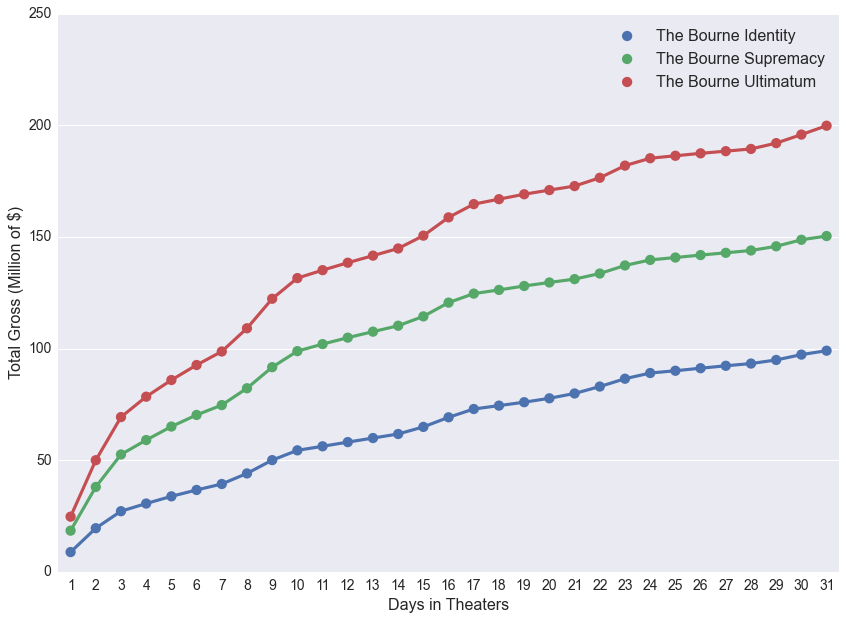

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 10
sns.pointplot(x="Days", y="TotalGross", hue="Title", 
              data=test2[(test2.Title.str.contains('Bourne'))])
plt.ylabel('Total Gross (Million of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)

In [10]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test[(test.Title == "Batman Begins") | 
                        (test.Title == "The Dark Knight") | 
                        (test.Title == "The Dark Knight Rises")])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

NameError: name 'sns' is not defined

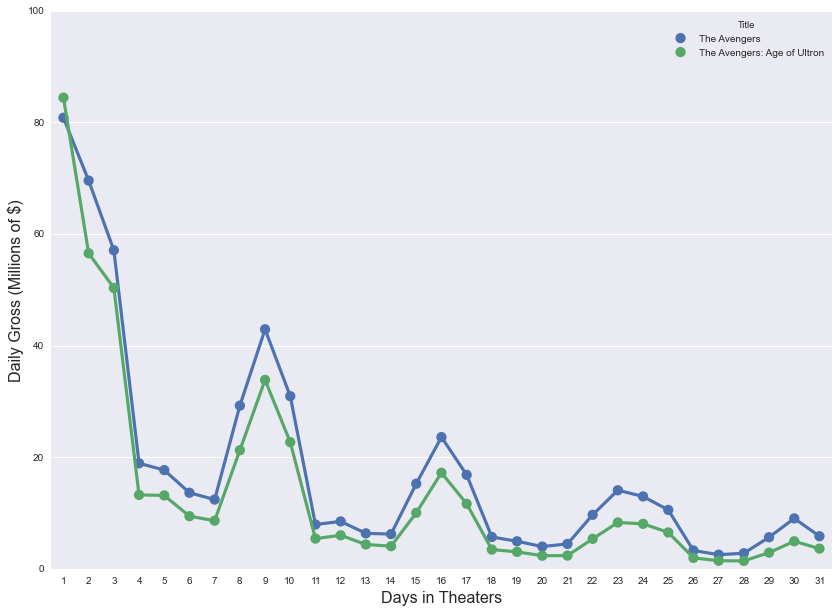

In [74]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test[(test.Title.str.contains('Avengers'))])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

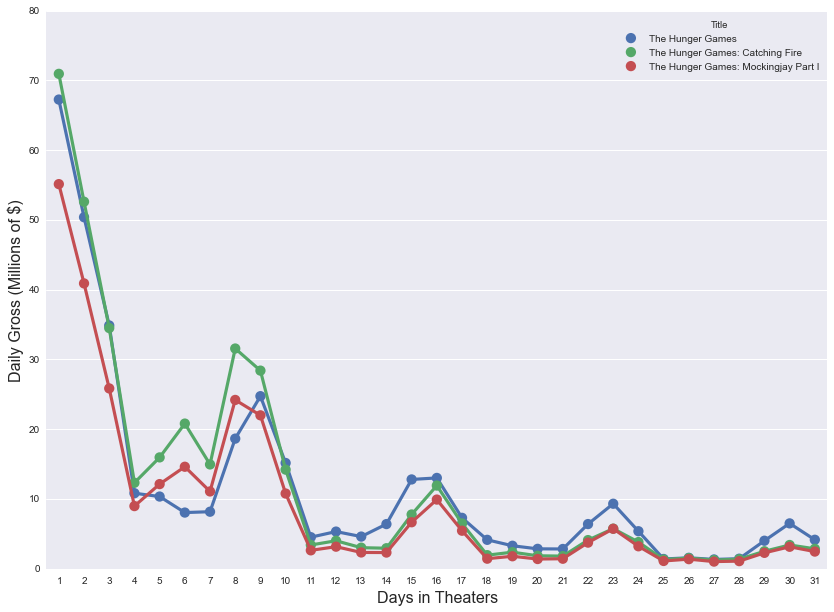

In [75]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test[(test.Title.str.contains('Hunger Games'))])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

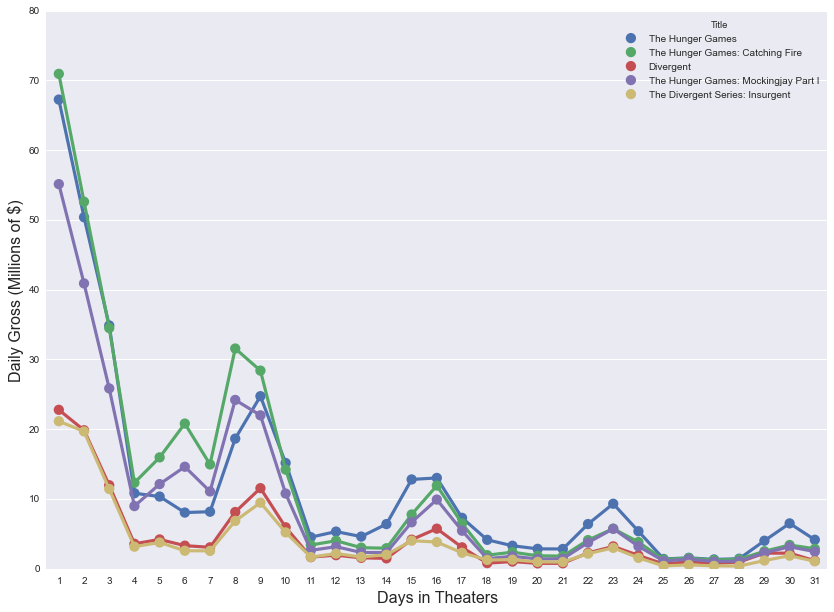

In [76]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test[(test.Title.str.contains('Divergent')) |
                        (test.Title.str.contains('Hunger Games'))])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

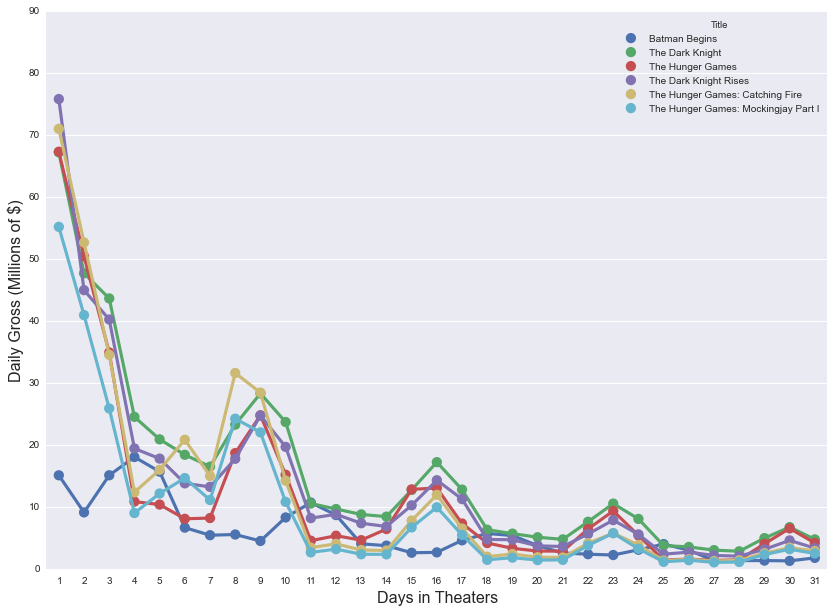

In [77]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test[(test.Title == "Batman Begins") | 
                        (test.Title == "The Dark Knight") | 
                        (test.Title == "The Dark Knight Rises") |
                        (test.Title.str.contains('Hunger Games'))])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

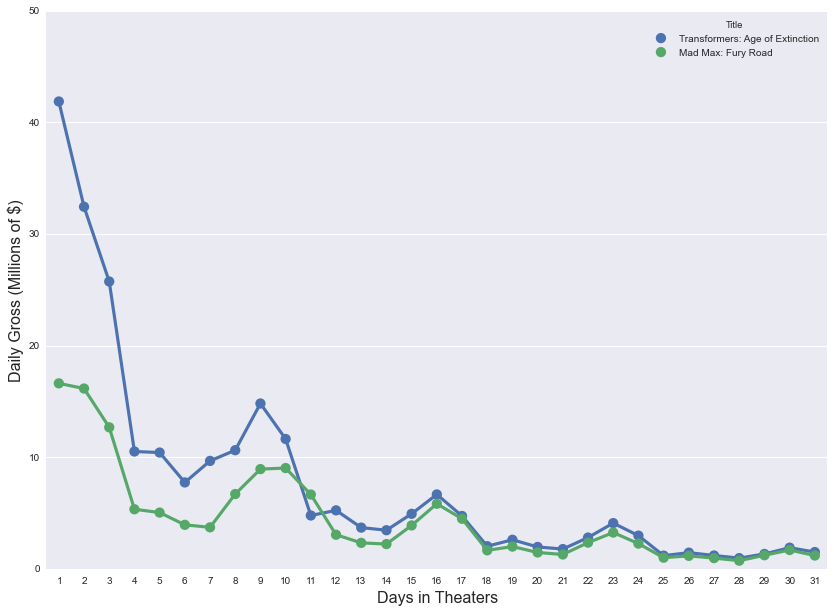

In [99]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test[(test.Title.str.contains('Mad Max'))| 
                        (test.Title == "Transformers: Age of Extinction")])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

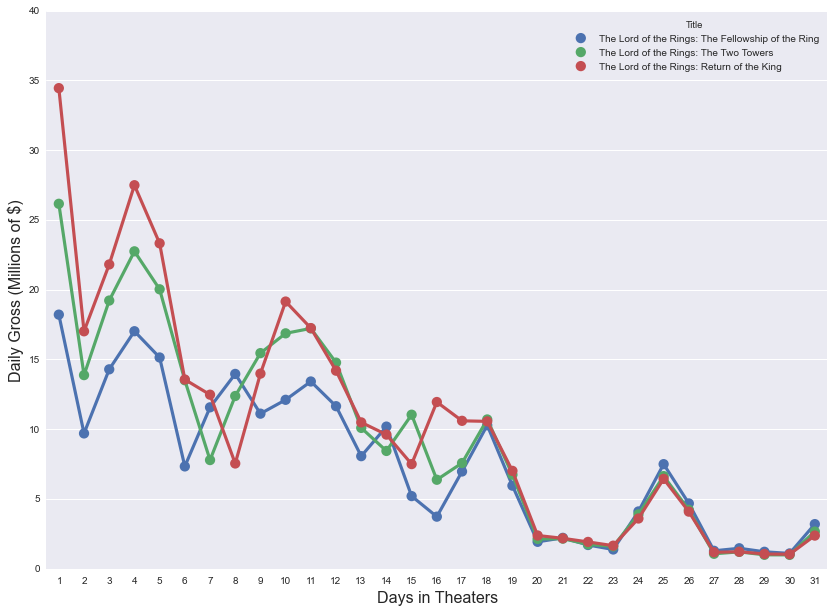

In [78]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test2[(test2.Title.str.contains('The Lord of the'))])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

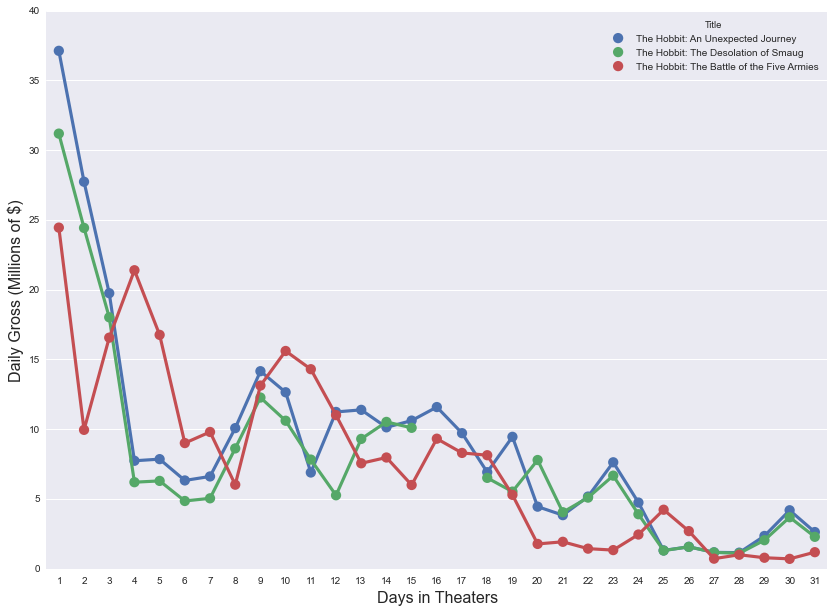

In [79]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test2[(test2.Title.str.contains('The Hobbit'))])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

/Users/jacoblehrhoff/anaconda/lib/python2.7/site-packages/matplotlib/legend.py:319: UserWarning: Unrecognized location "top left". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(six.iterkeys(self.codes))))


(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.]),
 <a list of 9 Text yticklabel objects>)

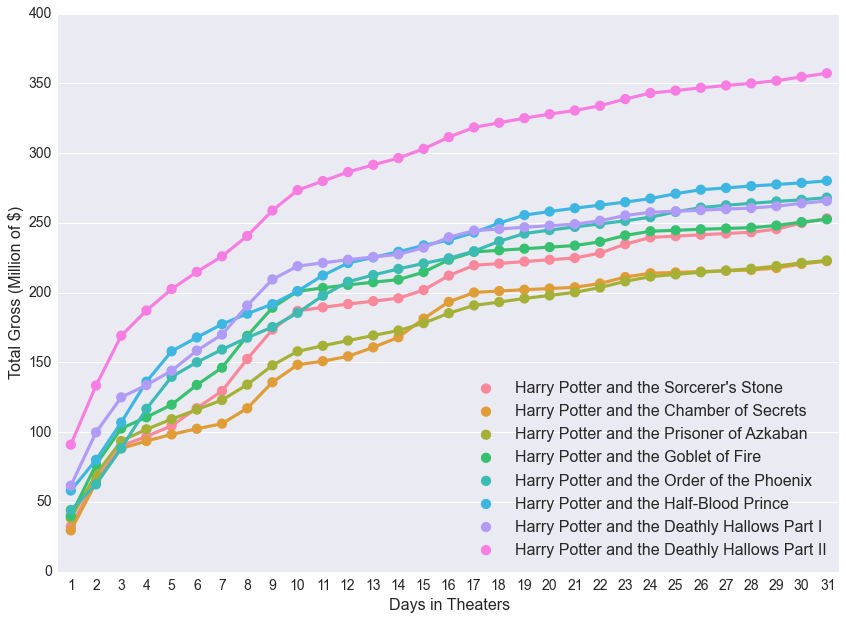

In [61]:
sns.pointplot(x="Days", y="TotalGross", hue="Title", 
              data=test2[(test2.Title.str.contains('Harry Potter'))])
plt.ylabel('Total Gross (Million of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)
plt.legend(fontsize=16, loc = "top left")
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)

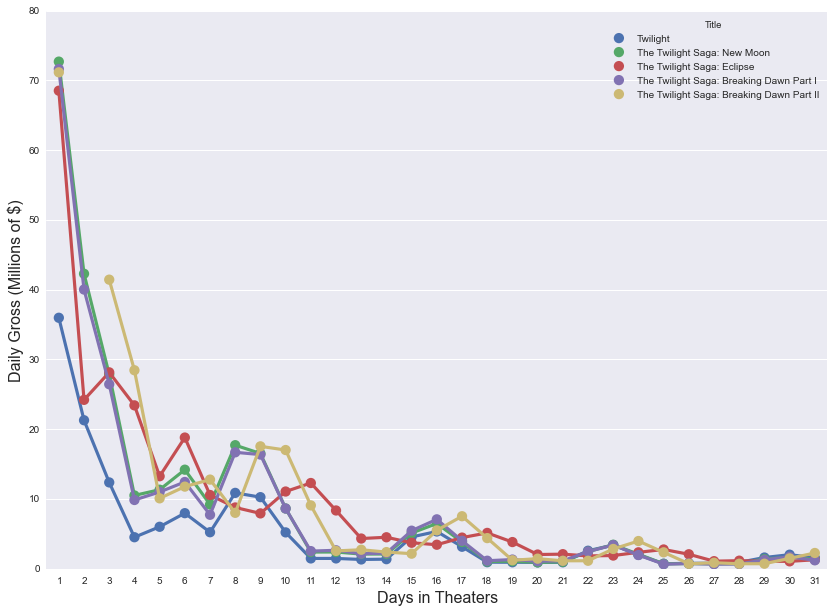

In [81]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test2[(test2.Title.str.contains('Twilight'))])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

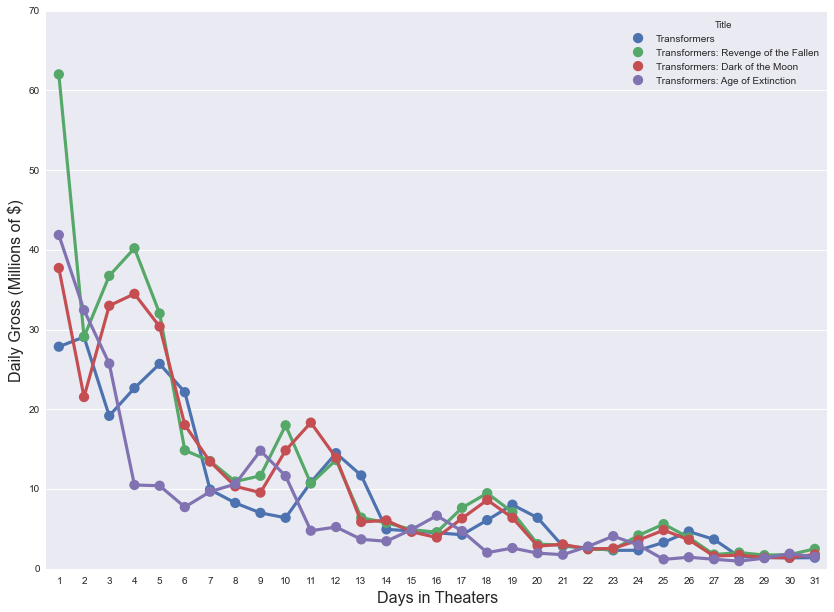

In [89]:
sns.pointplot(x="Days", y="Gross", hue="Title", 
              data=test2[(test2.Title.str.contains('Transformers'))])
plt.ylabel('Daily Gross (Millions of $)', fontsize=16)
plt.ylim(0,)
plt.xlabel('Days in Theaters', fontsize=16)

In [695]:
grp = test2.groupby(('Title','Rank'))
ranks = pd.DataFrame(grp['Rank'].count())
ranks['Count'] = ranks.Rank
ranks = ranks.drop('Rank', 1)
ranks.reset_index(inplace = True)
ranks

,Title,Rank,Count
0,American Hustle,-,8
1,American Hustle,2,5
2,American Hustle,3,1
3,American Hustle,4,4
4,American Hustle,5,3
5,American Hustle,6,4
6,Batman Begins,1,14
7,Batman Begins,2,9
8,Batman Begins,3,6
9,Batman Begins,4,1


In [747]:
ranks[ranks['Title'].str.contains('Avengers')]

,Title,Rank,Count
116,The Avengers,1,21
117,The Avengers,2,7
118,The Avengers,3,3
119,The Avengers: Age of Ultron,1,14
120,The Avengers: Age of Ultron,2,1
121,The Avengers: Age of Ultron,3,6
122,The Avengers: Age of Ultron,4,6
123,The Avengers: Age of Ultron,5,3
124,The Avengers: Age of Ultron,6,1


(array([  0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 6 Text yticklabel objects>)

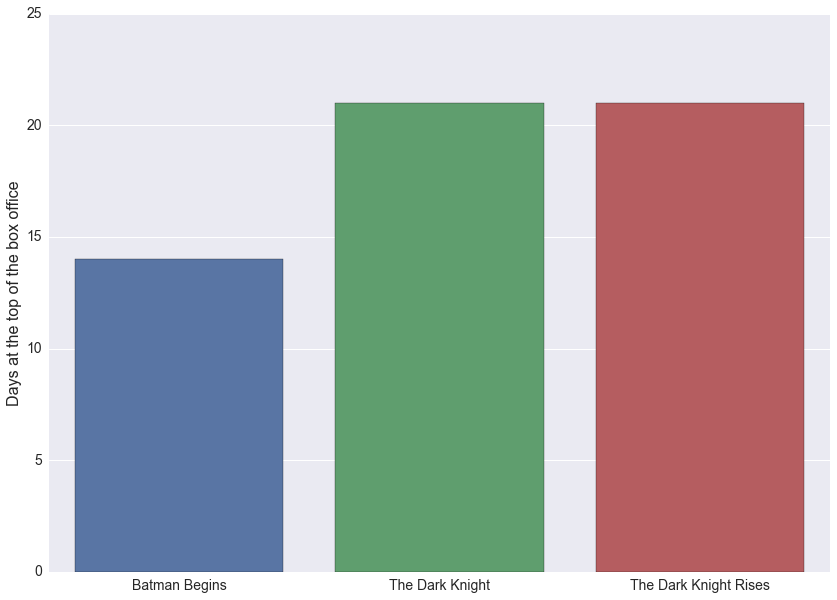

In [705]:
sns.barplot(x="Title", y="Count", 
            data = ranks[(ranks['Rank']=='1') &
                          ((ranks['Title'].str.contains('Batman')) |
                           (ranks['Title'].str.contains('Dark Knight')))])
plt.ylabel('Days at the top of the box office', fontsize=16)
plt.xlabel('')
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)


(array([  0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 6 Text yticklabel objects>)

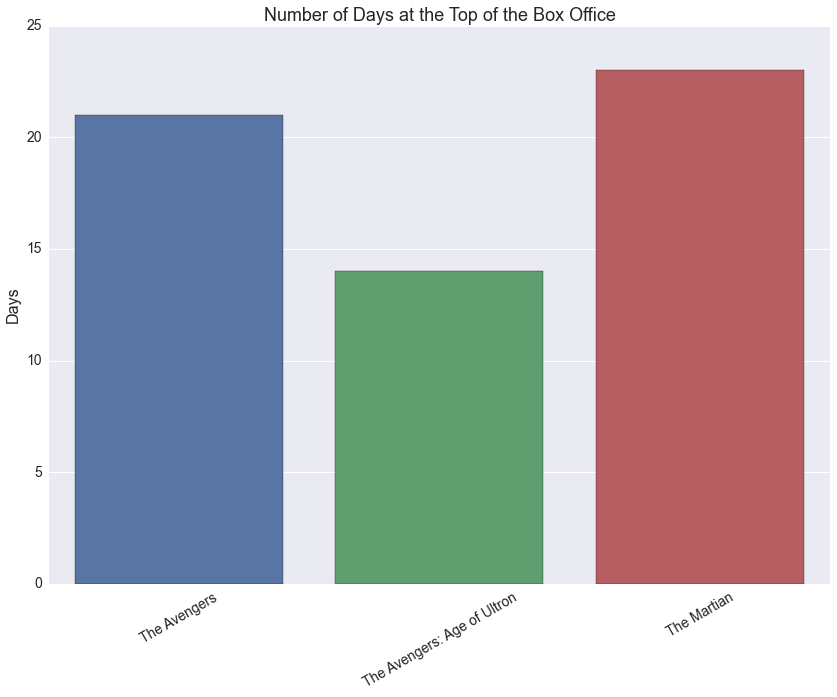

In [743]:
sns.barplot(x="Title", y="Count", data = ranks[(ranks['Rank']=='1') &
                                               ((ranks['Title'].str.contains('Martian')) |
                                                (ranks['Title'].str.contains('Avengers')))])
plt.ylabel('Days', fontsize=16)
plt.xlabel('')
plt.title('Number of Days at the Top of the Box Office', fontsize = 18)
plt.xticks(rotation = 30, fontsize = 14)
plt.yticks(fontsize = 14)

In [75]:
keywordList = ['Bourne', 'Batman Begins', 'Dark Knight', 'Green Zone', 'Hunger Games',
               'Avengers', 'Silver Linings Playbook', 'Elysium', 'American Hustle', 
               'Descendants', 'Divergent','Fault in Our Stars','Guardians of the Galaxy',
               'Interstellar','Jurassic World','The Martian','Lord of the Rings','The Hobbit',
               'Harry Potter','Twilight','Transformers','Mad Max','Saving Private Ryan', 
               'Toy Story', 'Finding Nemo', 'WALL-E', 'The Incredibles']

def grossscrape(keywordList):

    gross = pd.DataFrame()
    
    url = 'http://www.boxofficemojo.com/search/?q='
    plus = '%20'

    for keyword in keywordList:
    
        search = re.sub(' ','%20',keyword)
        data = requests.get(url + search).text
        data = BeautifulSoup(data)
        fontTag = data.find_all('font')
        movies = [tag.string for tag in fontTag]
        movies = movies[7:]
        movies
        data_sublists = [movies[i:i+8] for i in range(0, len(movies), 8)]
        data_sublists
        dataframe = pd.DataFrame(data_sublists [0:], columns = ['Title','','Lifetime Gross','','','','',''])
        dataframe = dataframe[['Title','Lifetime Gross']]
        dataframe = dataframe[dataframe.Title.str.contains(keyword)]
        gross = gross.append(dataframe)
    
    gross = gross[gross['Lifetime Gross'] != 'n/a']
    gross['Lifetime Gross'] = gross['Lifetime Gross'].apply(removePunc).apply(int)
    gross['Lifetime Gross'] = gross['Lifetime Gross'].apply(lambda x: float(x)).apply(lambda x: x/1000000)
    return gross

In [76]:
gross = grossscrape(keywordList)

In [748]:
gross[gross['Title'].str.contains('Twilight')]

,Unnamed: 0,Title,Lifetime Gross,Rating,Sequel
37,41,The Twilight Saga: Breaking Dawn Part 2,292.324737,48,Yes
38,42,The Twilight Saga: Breaking Dawn Part 1,281.287133,24,Yes
39,43,The Twilight Saga: Eclipse,300.531751,49,Yes
40,45,The Twilight Saga: New Moon,296.623634,28,Yes
41,46,Twilight,192.769854,48,No


In [234]:
gross.to_csv('gross.csv', sep = ',', encoding='utf-8')

In [179]:
movies = pd.merge(test2, gross, how = 'left', on = 'Title')

In [180]:
movies.to_csv('movies.csv', sep = ',', encoding = 'utf-8')

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.]),
 <a list of 10 Text yticklabel objects>)

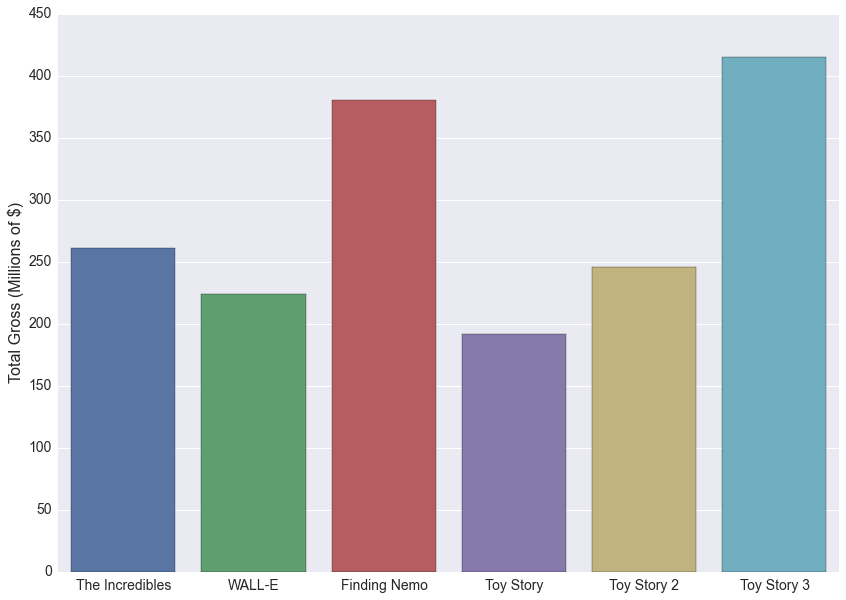

In [70]:
plot = sns.barplot(x="Title", y="Lifetime Gross", data=
                   gross[((gross['Title'].str.contains('Toy Story')) |
                         (gross['Title'].str.contains('WALL-E')) | 
                         (gross['Title'].str.contains('The Incredibles')) |
                         (gross['Title'].str.contains('Finding Nemo'))) &
                        (gross['Lifetime Gross'] > 100)].sort(ascending = False))
plt.ylabel('Total Gross (Millions of $)', fontsize=16)
plt.xlabel('')
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.]),
 <a list of 9 Text yticklabel objects>)

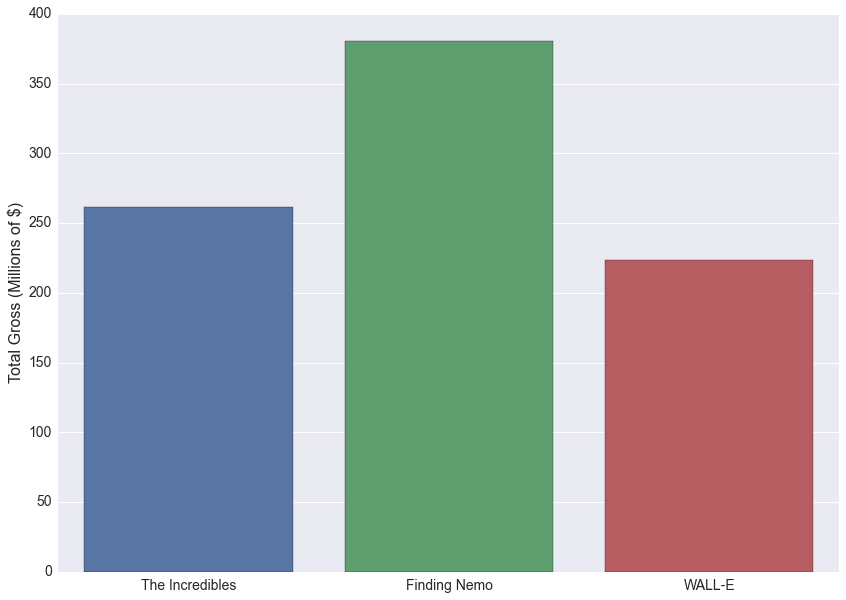

In [235]:
plot = sns.barplot(x="Title", y="Lifetime Gross", data=
                   gross[((gross['Title'].str.contains('WALL-E')) | 
                          (gross['Title'].str.contains('The Incredibles')) |
                          (gross['Title'].str.contains('Finding Nemo'))) &
                        (gross['Lifetime Gross'] > 100)].sort(ascending = False))
plt.ylabel('Total Gross (Millions of $)', fontsize=16)
plt.xlabel('')
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,   50.,  100.,  150.,  200.,  250.]),
 <a list of 6 Text yticklabel objects>)

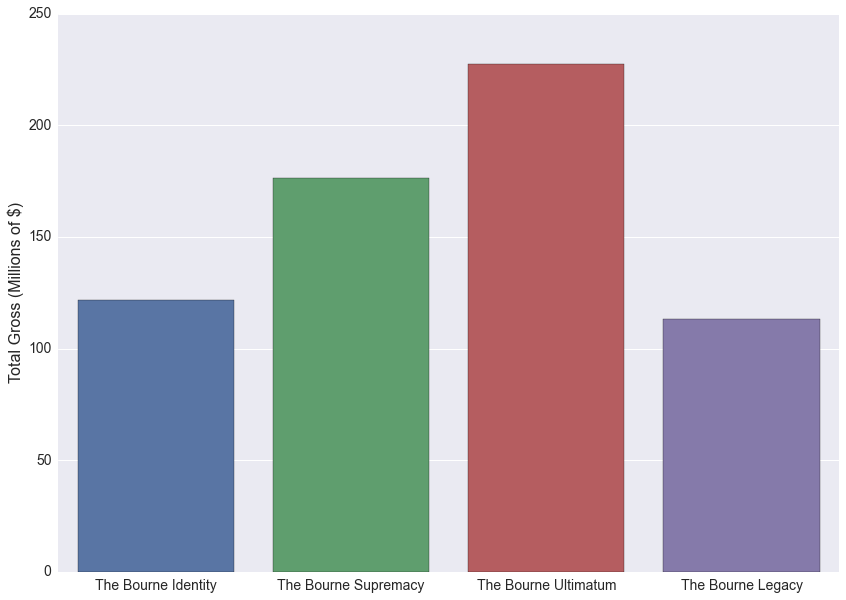

In [32]:
plot = sns.barplot(x="Title", y="Lifetime Gross", data=
                   gross[((gross['Title'].str.contains('Bourne'))
                         )].sort(ascending=False)) 
plt.ylabel('Total Gross (Millions of $)', fontsize=16)
plt.xlabel('')
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,   20.,   40.,   60.,   80.,  100.]),
 <a list of 6 Text yticklabel objects>)

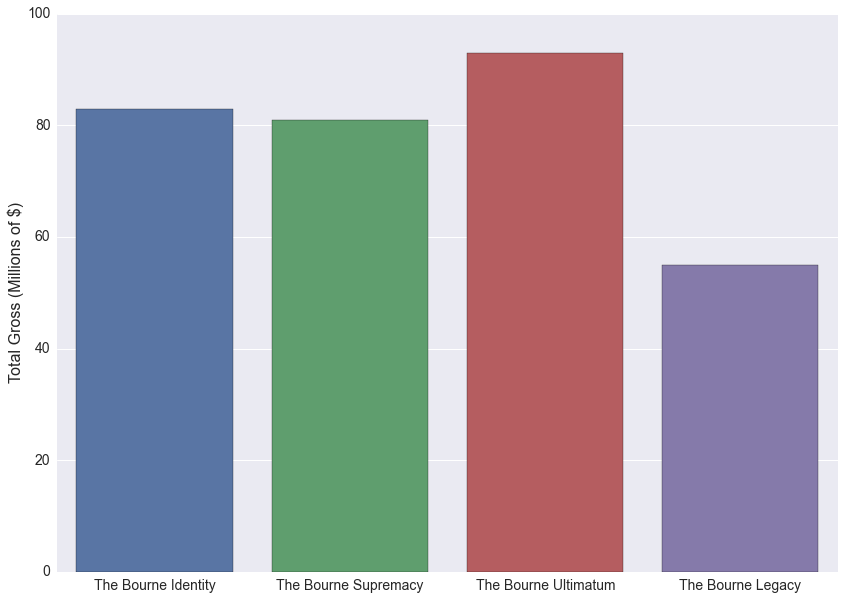

In [37]:
plot = sns.barplot(x="Title", y="Rating", data=
                   gross[((gross['Title'].str.contains('Bourne'))
                         )].sort(ascending=False)) 
plt.ylabel('Total Gross (Millions of $)', fontsize=16)
plt.xlabel('')
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)

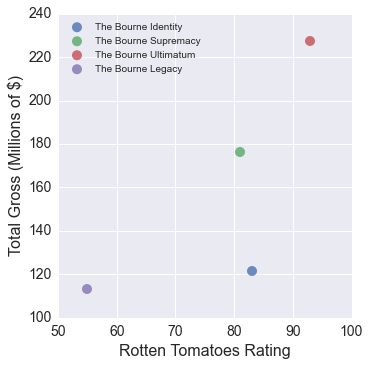

In [56]:
plot = sns.lmplot(x="Rating", y="Lifetime Gross", hue = "Title", fit_reg = False, data=
                   gross[((gross['Title'].str.contains('Bourne'))
                         )].sort(ascending=False), scatter_kws={"s": 100}, legend = False) 
plt.ylabel('Total Gross (Millions of $)', fontsize=16)
plt.xlabel('Rotten Tomatoes Rating', fontsize=16)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left')

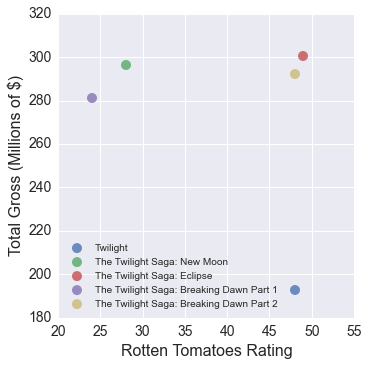

In [673]:
plot = sns.lmplot(x="Rating", y="Lifetime Gross", hue = "Title", fit_reg = False, data=
                   gross[((gross['Title'].str.contains('Twilight'))
                         )].sort(ascending=False), scatter_kws={"s": 100}, legend = False) 
plt.ylabel('Total Gross (Millions of $)', fontsize=16)
plt.xlabel('Rotten Tomatoes Rating', fontsize=16)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='lower left')

(0, 100)

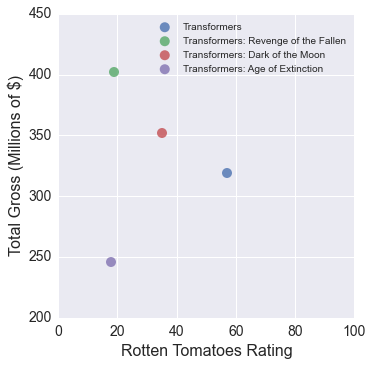

In [66]:
sns.lmplot(x="Rating", y="Lifetime Gross", hue = "Title", fit_reg = False, data=
                   gross[((gross['Title'].str.contains('Transformers'))
                         )].sort(ascending=False), scatter_kws={"s": 100}, legend = False) 
plt.ylabel('Total Gross (Millions of $)', fontsize=16)
plt.xlabel('Rotten Tomatoes Rating', fontsize=16)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper right')
plt.xlim(0,100)

In [19]:
gross = pd.read_csv('MovieProject/data/grossrating.csv')

In [468]:
gross

,Title,Lifetime Gross
1,The Bourne Legacy,113.203870
2,The Bourne Ultimatum,227.471070
3,The Bourne Supremacy,176.241941
4,The Bourne Identity,121.661683
0,Batman Begins,206.852432
0,The Dark Knight Rises,448.139099
1,The Dark Knight,534.858444
0,Green Zone,35.053660
1,The Hunger Games: Mockingjay - Part 1,337.135885
2,The Hunger Games: Catching Fire,424.668047


In [467]:
def find(lst, predicate):
    return (i for i, j in enumerate(lst) if predicate(j)).next()

keyword = 'twilight'
url = 'http://www.rottentomatoes.com/search/?search='
search = re.sub(' ','+',keyword)
data = requests.get(url + search).text
data = BeautifulSoup(data)
Tag2 = data.find_all('class' == ['tMeterScore', 'unstyled articleLink'])
movies1 = [tag.string for tag in Tag2]
movies1 = [x for x in movies1 if x is not None]
movies1 = movies1[300:]
index = find(movies1, lambda x: '%' in x)
movies1 = movies1[index:]
sublist = [movies1[i:i+6] for i in range(0, len(movies1), 6)]
dataframe = pd.DataFrame(sublist [0:], columns = [
        'Rating','Title','','','',''])
dataframe = dataframe[['Rating','Title']]
dataframe[0:8]

,Rating,Title
0,48%,Twilight
1,28%,The Twilight Saga: New Moon
2,48%,The Twilight Saga: Breaking Dawn Part 2
3,No Score Yet,Twilight
4,59%,Twilight
5,More Movies…,.actor_results_ul li { padding: 0px;}
6,Twilight Creations,Twilight Creations
7,Beyond Twilight,Beyond Twilight


In [383]:
find(movies1, lambda x: '%' in x)

9

In [77]:
def find(lst, predicate):
    return (i for i, j in enumerate(lst) if predicate(j)).next()

def reviewscrape(keywordList):

    reviews = pd.DataFrame()
    url = 'http://www.rottentomatoes.com/search/?search='
    
    for keyword in keywordList:
        search = re.sub(' ','+',keyword)
        data = requests.get(url + search).text
        data = BeautifulSoup(data)
        Tag2 = data.find_all('class' == ['tMeterScore', 'unstyled articleLink'])
        movies1 = [tag.string for tag in Tag2]
        movies1 = [x for x in movies1 if x is not None]
        movies1 = movies1[300:]
        index = find(movies1, lambda x: '%' in x)
        movies1 = movies1[index:]
        sublist = [movies1[i:i+6] for i in range(0, len(movies1), 6)]
        dataframe = pd.DataFrame(sublist [0:], columns = ['Rating','Title','','','',''])
        dataframe = dataframe[['Rating','Title']][0:6]
        reviews = reviews.append(dataframe)
    
    return reviews

In [85]:
reviews = reviewscrape(keywordList)

In [86]:
grossrating = pd.merge(gross, reviews, how = 'left')
grossrating

,Title,Lifetime Gross,Rating
0,The Bourne Legacy,113.203870,55%
1,The Bourne Ultimatum,227.471070,93%
2,The Bourne Supremacy,176.241941,81%
3,The Bourne Identity,121.661683,83%
4,Batman Begins,206.852432,85%
5,The Dark Knight Rises,448.139099,87%
6,The Dark Knight,534.858444,94%
7,Green Zone,35.053660,NaN
8,The Hunger Games: Mockingjay - Part 1,337.135885,65%
9,The Hunger Games: Catching Fire,424.668047,89%


In [87]:
grossrating = grossrating[grossrating.Rating != u' No Score Yet ']

In [88]:
grossrating = grossrating[grossrating['Lifetime Gross'] > 35]
grossrating.to_csv('grossrating.csv', sep = ',', encoding='utf-8')
grossrating

,Title,Lifetime Gross,Rating
0,The Bourne Legacy,113.203870,55%
1,The Bourne Ultimatum,227.471070,93%
2,The Bourne Supremacy,176.241941,81%
3,The Bourne Identity,121.661683,83%
4,Batman Begins,206.852432,85%
5,The Dark Knight Rises,448.139099,87%
6,The Dark Knight,534.858444,94%
7,Green Zone,35.053660,NaN
8,The Hunger Games: Mockingjay - Part 1,337.135885,65%
9,The Hunger Games: Catching Fire,424.668047,89%


In [89]:
# throwing my hands in the air and fixing 12 blank cells.
grossrating.loc[7, 'Rating'] = '53%'
grossrating.loc[14, 'Rating'] = '92%'
grossrating.loc[19, 'Rating'] = '30%'
grossrating.loc[31, 'Rating'] = '74%'
grossrating.loc[33, 'Rating'] = '96%'
grossrating.loc[34, 'Rating'] = '78%'
grossrating.loc[38, 'Rating'] = '91%'
grossrating.loc[39, 'Rating'] = '82%'
grossrating.loc[40, 'Rating'] = '80%'
grossrating.loc[42, 'Rating'] = '24%'
grossrating.loc[43, 'Rating'] = '49%'
grossrating.loc[66, 'Rating'] = '99%'
grossrating.loc[67, 'Rating'] = '96%'
grossrating = grossrating[['Title','Lifetime Gross','Rating']]

In [90]:
grossrating

,Title,Lifetime Gross,Rating
0,The Bourne Legacy,113.203870,55%
1,The Bourne Ultimatum,227.471070,93%
2,The Bourne Supremacy,176.241941,81%
3,The Bourne Identity,121.661683,83%
4,Batman Begins,206.852432,85%
5,The Dark Knight Rises,448.139099,87%
6,The Dark Knight,534.858444,94%
7,Green Zone,35.053660,53%
8,The Hunger Games: Mockingjay - Part 1,337.135885,65%
9,The Hunger Games: Catching Fire,424.668047,89%


In [90]:
import re
grossrating.Rating = grossrating.Rating.apply(str).apply(removePunc).apply(int)

In [92]:
grossrating.to_csv('grossrating.csv', sep = ',', encoding='utf-8')

In [95]:
grossrating['Sequel'] = ['Yes','Yes','Yes','No','No','Yes','Yes','No','Yes','Yes',
                         'No','Yes','No', 'No','No','No','No','Yes','No','No','No','Yes',
                        'No','Yes','Yes','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes',
                        'Yes','Yes','Yes','No','Yes','Yes','Yes','Yes','No','','Yes','Yes',
                        'Yes','No','Yes','Yes','No','Yes','Yes','No','No','No','No']

In [100]:
grossrating = grossrating[grossrating.index != 48]

In [101]:
grossrating.to_csv('grossrating.csv', sep = ',', encoding='utf-8')

In [626]:
def yearscrape():

    total = pd.DataFrame()
    
    url = 'http://www.boxofficemojo.com/yearly/chart/?yr='

    for year in range(2006,2016):
    
        data = requests.get(url + str(year)).text
        data = BeautifulSoup(data)
        fontTag = data.find_all('font')
        movies = [tag.string for tag in fontTag]
        movies = movies[19:]
        data_sublists = [movies[i:i+9] for i in range(0, len(movies), 9)]
        dataframe = pd.DataFrame(data_sublists [0:], columns = ['Rank','Title','',
                                                        'Total Gross','','','','',''])
        dataframe = dataframe[['Rank','Title','Total Gross']]
        dataframe['Year'] = year
        dataframe = dataframe[0:10]
        total = total.append(dataframe)
    
#     total['Total Gross'] = total['Total Gross'].apply(removePunc).apply(int)
#     total['Total Gross'] = total['Total Gross'].apply(lambda x: float(x)).apply(lambda x: x/1000000)
    return total

In [627]:
total = yearscrape()

In [614]:
def yearscrape2():

    total2 = pd.DataFrame()
    
    url = 'http://www.boxofficemojo.com/yearly/chart/?yr='

    for year in range(1996,2002):
    
        data = requests.get(url + str(year)).text
        data = BeautifulSoup(data)
        fontTag = data.find_all('font')
        movies = [tag.string for tag in fontTag]
        movies = movies[18:]
        data_sublists = [movies[i:i+8] for i in range(0, len(movies), 8)]
        dataframe = pd.DataFrame(data_sublists [0:], columns = ['Rank','Title','',
                                                        'Total Gross','','','',''])
        dataframe = dataframe[['Rank','Title','Total Gross']]
        dataframe['Year'] = year
        dataframe = dataframe[0:10]
        total2 = total2.append(dataframe)
    
#     total['Total Gross'] = total['Total Gross'].apply(removePunc).apply(int)
#     total['Total Gross'] = total['Total Gross'].apply(lambda x: float(x)).apply(lambda x: x/1000000)
    return total2

def yearscrape3():

    total3 = pd.DataFrame()
    
    url = 'http://www.boxofficemojo.com/yearly/chart/?yr='

    for year in range(2002,2006):
    
        data = requests.get(url + str(year)).text
        data = BeautifulSoup(data)
        fontTag = data.find_all('font')
        movies = [tag.string for tag in fontTag]
        movies = movies[19:]
        data_sublists = [movies[i:i+9] for i in range(0, len(movies), 9)]
        dataframe = pd.DataFrame(data_sublists [0:], columns = ['Rank','Title','',
                                                        'Total Gross','','','','',''])
        dataframe = dataframe[['Rank','Title','Total Gross']]
        dataframe['Year'] = year
        dataframe = dataframe[0:10]
        total3 = total3.append(dataframe)
    
#     total['Total Gross'] = total['Total Gross'].apply(removePunc).apply(int)
#     total['Total Gross'] = total['Total Gross'].apply(lambda x: float(x)).apply(lambda x: x/1000000)
    return total3

In [615]:
total2 = yearscrape2()
total3 = yearscrape3()

In [650]:
total4 = pd.concat((total2,total3))
total4['Sequel'] = ['N','N','N','N','N','Y','N','Y','N','N',
'N','N','Y','N','N','N','N','Y','N','Y',
'N','N','N','N','N','Y','N','N','Y','N',
'Y','N','Y','Y','N','Y','N','N','N','N',
'N','N','Y','N','N','N','N','N','N','N',
'N','N','N','N','Y','Y','N','Y','Y','Y',
'N','Y','Y','Y','N','N','Y','Y','N','N',
'Y','N','N','Y','N','Y','N','Y','Y','N',
'Y','Y','N','Y','N','Y','N','Y','N','N',
'Y','N','Y','N','Y','N','Y','Y','N','N']


In [651]:
total4['Total Gross'] = total4['Total Gross'].apply(removePunc).apply(int)
total4['Total Gross'] = total4['Total Gross'].apply(lambda x: float(x)).apply(lambda x: x/1000000)

In [653]:
grp = total4.groupby(('Year', 'Sequel'))
huh = pd.DataFrame(grp['Sequel'].count())
huh['Percent'] = huh['Sequel']/10
huh = huh.drop('Sequel',1)
huh.reset_index(inplace = True)
huh

grp = total4.groupby(('Year','Sequel'))
test = pd.DataFrame(grp['Total Gross'].mean())
test.reset_index(inplace=True) 
test

top10sold = pd.merge(huh, test)
top10sold

,Year,Sequel,Percent,Total Gross
0,1996,N,0.8,173.276749
1,1996,Y,0.2,132.501656
2,1997,N,0.7,231.411032
3,1997,Y,0.3,164.216273
4,1998,N,0.8,166.946548
5,1998,Y,0.2,140.235450
6,1999,N,0.6,179.441352
7,1999,Y,0.4,263.518095
8,2000,N,0.9,186.982269
9,2000,Y,0.1,215.409889


In [657]:
top10merge = pd.concat([top10sold, top10s])
top10merge

,Year,Sequel,Percent,Total Gross
0,1996,N,0.8,173.276749
1,1996,Y,0.2,132.501656
2,1997,N,0.7,231.411032
3,1997,Y,0.3,164.216273
4,1998,N,0.8,166.946548
5,1998,Y,0.2,140.235450
6,1999,N,0.6,179.441352
7,1999,Y,0.4,263.518095
8,2000,N,0.9,186.982269
9,2000,Y,0.1,215.409889


(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

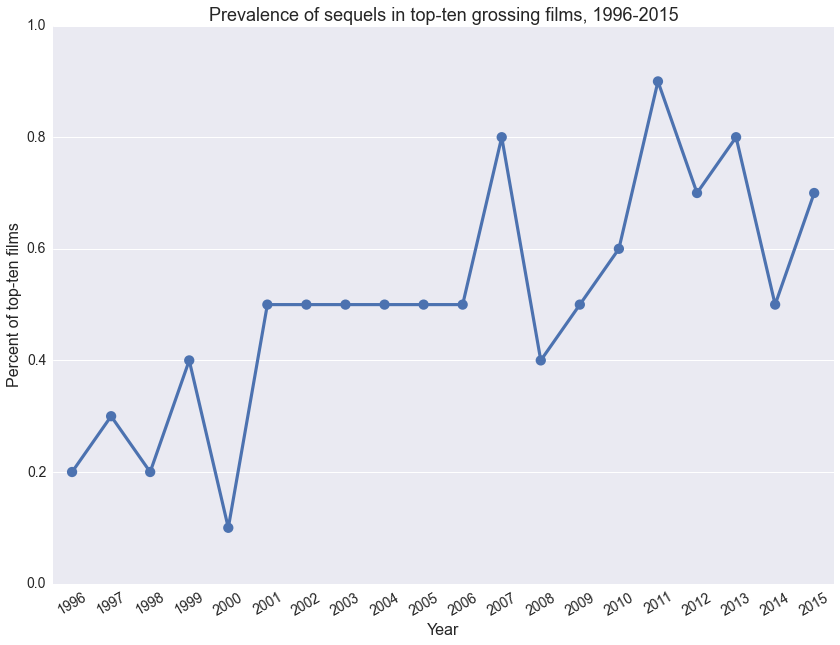

In [671]:
sns.pointplot(x = 'Year', y = 'Percent', data = top10merge[top10merge['Sequel']=='Y'], 
              fit_reg=False, scatter_kws={"s": 100}, legend = False) 
plt.ylabel('Percent of top-ten films', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Prevalence of sequels in top-ten grossing films, 1996-2015', fontsize = 18)
plt.xticks(rotation = 30, fontsize = 14)
plt.yticks(fontsize = 14)

In [654]:
grp = total4.groupby('Sequel')
test = pd.DataFrame(grp['Total Gross'].mean())
test['Count'] = grp['Sequel'].count()
test['Percent'] = test['Count']/totals['Count'].sum()
test

,Total Gross,Count,Percent
Sequel,,,
N,208.630948,63,0.63
Y,231.658046,37,0.37


In [631]:
total['Total Gross'] = total['Total Gross'].apply(removePunc).apply(int)
total['Total Gross'] = total['Total Gross'].apply(lambda x: float(x)).apply(lambda x: x/1000000)

In [284]:
total.index = range(100)

,Rank,Title,Total Gross,Year
0,1,Avatar,749.766139,2009
1,1,Jurassic World,652.054116,2015
2,1,Marvel's The Avengers,623.357910,2012
3,1,The Dark Knight,533.345358,2008
4,2,Avengers: Age of Ultron,459.005868,2015
5,2,The Dark Knight Rises,448.139099,2012
6,1,The Hunger Games: Catching Fire,424.668047,2013
7,1,Pirates of the Caribbean: Dead Man's Chest,423.315812,2006
8,1,Toy Story 3,415.004880,2010
9,2,Iron Man 3,409.013994,2013


In [637]:
total = total.sort(columns = 'Total Gross', ascending = False)
total.index = range(100)
total['Sequel'] = ['N','Y','Y','Y','Y','Y','Y','Y','Y','Y',
                  'N','Y','N','Y','Y','N','Y','Y','N','Y',
                  'Y','Y','Y','N','Y','Y','N','Y','Y','Y',
                  'Y','Y','Y','Y','Y','Y','N','N','Y','Y',
                  'Y','Y','N','N','Y','Y','Y','Y','N','Y',
                  'N','N','Y','Y','N','N','Y','N','N','Y',
                  'Y','Y','N','Y','Y','Y','N','Y','N','N',
                  'Y','Y','N','N','N','Y','Y','N','N','Y',
                  'Y','N','Y','N','Y','N','N','Y','Y','N',
                  'Y','Y','Y','N','Y','N','Y','Y','N','N']

In [643]:
total

,Rank,Title,Total Gross,Year,Sequel
0,1,Avatar,749.766139,2009,N
1,1,Jurassic World,652.061061,2015,Y
2,1,Marvel's The Avengers,623.357910,2012,Y
3,1,The Dark Knight,533.345358,2008,Y
4,2,Avengers: Age of Ultron,459.005868,2015,Y
5,2,The Dark Knight Rises,448.139099,2012,Y
6,1,The Hunger Games: Catching Fire,424.668047,2013,Y
7,1,Pirates of the Caribbean: Dead Man's Chest,423.315812,2006,Y
8,1,Toy Story 3,415.004880,2010,Y
9,2,Iron Man 3,409.013994,2013,Y


In [638]:
grp = total.groupby(('Year', 'Sequel'))
huh = pd.DataFrame(grp['Sequel'].count())
huh['Percent'] = huh['Sequel']/10
huh = huh.drop('Sequel',1)
huh.reset_index(inplace = True)
huh

,Year,Sequel,Percent
0,2006,N,0.5
1,2006,Y,0.5
2,2007,N,0.2
3,2007,Y,0.8
4,2008,N,0.6
5,2008,Y,0.4
6,2009,N,0.5
7,2009,Y,0.5
8,2010,N,0.4
9,2010,Y,0.6


In [639]:
import numpy as np

grp = total.groupby(('Year','Sequel'))
test = pd.DataFrame(grp['Total Gross'].mean())
test.reset_index(inplace=True) 
test


,Year,Sequel,Total Gross
0,2006,N,214.809833
1,2006,Y,244.107209
2,2007,N,233.503974
3,2007,Y,280.585470
4,2008,N,222.150070
5,2008,Y,299.706464
6,2009,N,357.016192
7,2009,Y,295.607866
8,2010,N,240.623337
9,2010,Y,316.146861


In [640]:
top10s = pd.merge(huh, test)

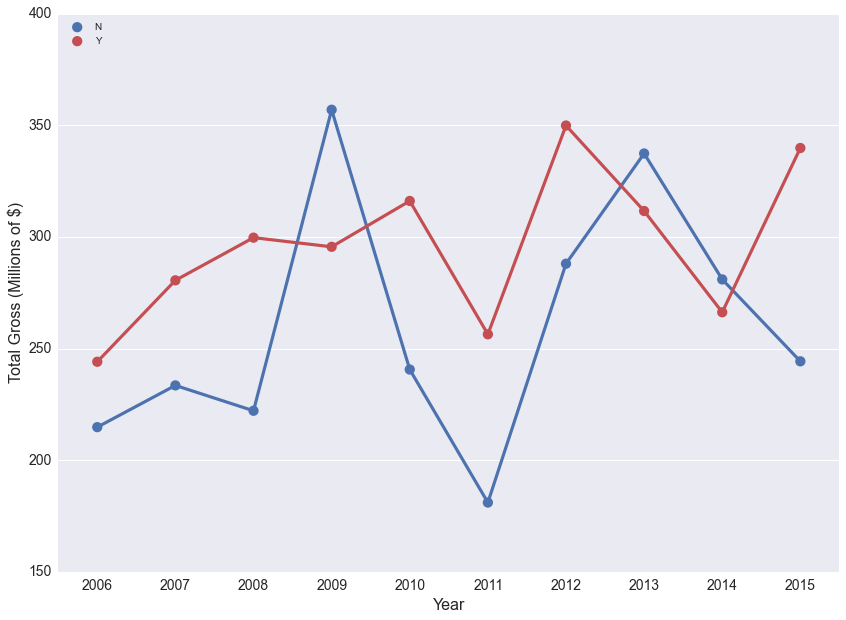

In [641]:
sns.pointplot(x = 'Year', y = 'Total Gross', hue = 'Sequel', data = test, 
           fit_reg=False, scatter_kws={"s": 100}, 
           legend = False, palette = ('#4C72B0','#C44E52')) 
plt.ylabel('Total Gross (Millions of $)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='upper left')

In [642]:
grp = total.groupby('Sequel')
totals = pd.DataFrame(grp['Total Gross'].mean())
totals['Count'] = grp['Sequel'].count()
totals['Percent'] = totals['Count']/totals['Count'].sum()
test = totals
test

,Total Gross,Count,Percent
Sequel,,,
N,263.316747,36,0.36
Y,296.875707,64,0.64


In [310]:
test.index = ("No","Yes")
test

,Total Gross,Count,Percent
No,264.432861,41,0.41
Yes,298.933339,59,0.59


In [328]:
test["Total Gross"][1]-test["Total Gross"][0]

34.500477764365598

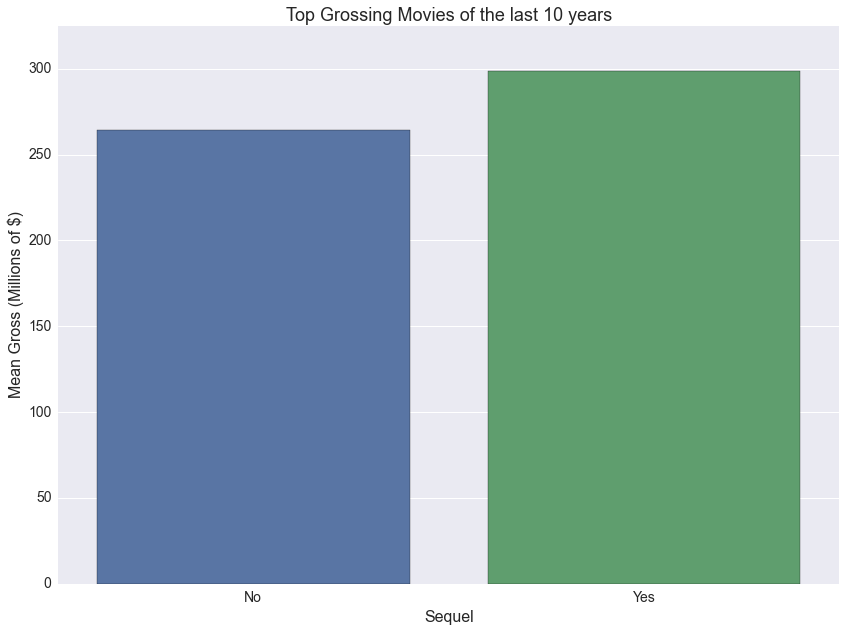

In [326]:
plot = sns.barplot(y="Total Gross", x = test.index, data=totals) 
plt.ylabel('Mean Gross (Millions of $)', fontsize=16)
plt.xlabel('Sequel', fontsize=16)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0, 325)
plt.title('Top Grossing Movies of the last 10 years', fontsize = 18)

(array([ 0.4 ,  0.45,  0.5 ,  0.55,  0.6 ]),
 <a list of 5 Text yticklabel objects>)

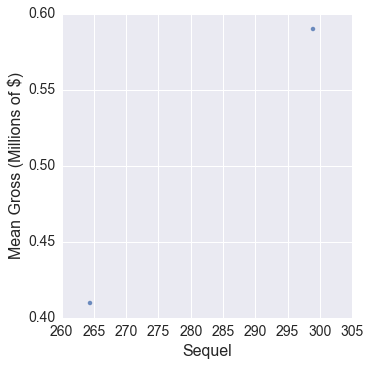

In [321]:
plot = sns.lmplot(x = "Total Gross", y = "Percent", data=totals, fit_reg = False)
plt.ylabel('Mean Gross (Millions of $)', fontsize=16)
plt.xlabel('Sequel', fontsize=16)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print tweet.text

In [ ]:
# martianTweet = tweepy.Cursor(api.search, q='#themartian').items(10)

# for tweet in martianTweet:
#     print tweet.created_at, tweet.text, tweet.lang

In [ ]:
import tweepy
#override tweepy.StreamListener to add logic to on_status
class MyStreamListener(tweepy.StreamListener):

    def on_status(self, status):
        print(status.text)

    def on_data(self, data):
        
        try:
            saveFile = open('raw_tweets.json', 'a')
            saveFile.write(data)
            saveFile.write('\n')
            saveFile.close()

            return True
        except BaseException, e:
            #print 'failed ondata,', str(e)
            time.sleep(5)
            pass

    def on_error(self, status):
        print status

In [ ]:
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

In [ ]:
hash_list = ['#themartian','#goosebumpsmovie','#hotelt2', '#bridgeofspies', \
             '#crimsonpeak','#theintern','#panmovie', '#sicario', '#woodlawn', \
            '#scortchtrials','#stevejobsmovie']
myStream.filter(track=hash_list)
# myStream.filter(track=['hotelt2'])
# myStream.filter(track=['goosebumps'])
# myStream.filter(track=['bridgeofspies'])
# myStream.filter(track=['crimsonpeak'])
# myStream.filter(track=['theintern'])
# myStream.filter(track=['panmovie'])
# myStream.filter(track=['sicario'])
# myStream.filter(track=['woodlawn'])
# myStream.filter(track=['scortchtrials'])
# myStream.filter(track=['stevejobsmovie'])
# myStream.filter(track=[''])